## Based on https://www.tensorflow.org/tutorials/load_data/csv

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


### One hot encoding the class labels 

In [4]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing severoty column (label encoded values of severities)
enc_df = pd.DataFrame(enc.fit_transform(data[['Severity']]).toarray(), index = data.index)


# merge with main df bridge_df on key values
data2 = pd.concat([data, enc_df], axis = 1)
data2

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity,0,1,2,3
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,3.0,4.0,5.0,3,0.0,0.0,0.0,1.0
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,19.0,17.0,4.0,3,0.0,0.0,0.0,1.0
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,1.0,5.0,3.0,0.0,1,0.0,1.0,0.0,0.0
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,2.0,0.0,0.0,0,1.0,0.0,0.0,0.0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,1.0,12.0,13.0,2.0,3,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190460,111385,2.0,53.596167,0.0,0.0,1.0,164.0,88.0,37.0,92.0,...,0.0,0.0,2.0,14.0,4.0,1,0.0,1.0,0.0,0.0
190467,111392,1.0,72.539357,0.0,1.0,1.0,167.0,67.0,39.0,89.0,...,0.0,1.0,4.0,1.0,0.0,3,0.0,0.0,0.0,1.0
190469,111394,2.0,46.986995,0.0,1.0,1.0,158.0,56.0,35.0,89.0,...,1.0,0.0,15.0,24.0,6.0,1,0.0,1.0,0.0,0.0
190502,111424,2.0,75.698836,0.0,1.0,0.0,150.0,68.0,36.0,96.0,...,0.0,0.0,5.0,16.0,8.0,3,0.0,0.0,0.0,1.0


In [5]:
enc_df.shape

(21818, 4)

In [4]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']

continuous = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP',
              'BMI','Epworth_scale','Pichots_scale','Depression_scale']

In [5]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [6]:
scaler = MinMaxScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test) 

In [9]:
print(X_train.shape, X_test.shape)

(17454, 49) (4364, 49)


### LSTM

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128, activation = 'relu', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = 'relu')) 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation = 'softmax')) 


In [11]:
X_train.shape

(17454, 49)

In [7]:
X_train_lstm = X_train.reshape(X_train.shape[0],1,49) # LSTM requires a 3D array in the format: (# samples, timesteps, # features)

X_test_lstm = X_test.reshape(X_test.shape[0], 1, 49)

In [8]:
X_train_lstm.shape

(17454, 1, 49)

In [14]:
opt = tf.keras.optimizers.Adam(lr = 1e-5, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_lstm, y_train, epochs = 10)


C:\Users\amona\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
546/546 [==============================] - 24s 21ms/step - loss: 1.3794 - accuracy: 0.3898
Epoch 2/10
546/546 [==============================] - 11s 21ms/step - loss: 1.3606 - accuracy: 0.4023
Epoch 3/10
546/546 [==============================] - 13s 24ms/step - loss: 1.3306 - accuracy: 0.4023
Epoch 4/10
546/546 [==============================] - 12s 22ms/step - loss: 1.3038 - accuracy: 0.4023
Epoch 5/10
546/546 [==============================] - 14s 26ms/step - loss: 1.2936 - accuracy: 0.4023
Epoch 6/10
546/546 [==============================] - 14s 26ms/step - loss: 1.2867 - accuracy: 0.4023
Epoch 7/10
546/546 [==============================] - 14s 26ms/step - loss: 1.2828 - accuracy: 0.4023
Epoch 8/10
546/546 [==============================] - 14s 25ms/step - loss: 1.2759 - accuracy: 0.4023
Epoch 9/10
546/546 [==============================] - 13s 24ms/step - loss: 1.2709 - accuracy: 0.4023
Epoch 10/10
546/546 [==============================] - 14s 25ms/step - loss: 1.265

In [16]:
val_loss, val_acc = model.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 3s 10ms/step - loss: 1.2615 - accuracy: 0.4024


### SimpleRNN

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(12, activation = 'tanh'))
model.add(tf.keras.layers.Dense(12, activation = 'relu')) 
model.add(tf.keras.layers.Dense(4, activation = 'softmax')) 


opt = tf.keras.optimizers.Adam(lr = 1e-5, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_lstm, y_train, epochs = 10)

Epoch 1/10
546/546 [==============================] - 8s 8ms/step - loss: 1.3711 - accuracy: 0.2594
Epoch 2/10
546/546 [==============================] - 5s 8ms/step - loss: 1.3563 - accuracy: 0.2947
Epoch 3/10
546/546 [==============================] - 5s 9ms/step - loss: 1.3454 - accuracy: 0.3223
Epoch 4/10
546/546 [==============================] - 5s 8ms/step - loss: 1.3371 - accuracy: 0.3525
Epoch 5/10
546/546 [==============================] - 4s 8ms/step - loss: 1.3305 - accuracy: 0.3709
Epoch 6/10
546/546 [==============================] - 5s 8ms/step - loss: 1.3253 - accuracy: 0.3833
Epoch 7/10
546/546 [==============================] - 5s 9ms/step - loss: 1.3209 - accuracy: 0.3906
Epoch 8/10
546/546 [==============================] - 6s 11ms/step - loss: 1.3172 - accuracy: 0.3956
Epoch 9/10
546/546 [==============================] - 7s 13ms/step - loss: 1.3139 - accuracy: 0.3986
Epoch 10/10
546/546 [==============================] - 5s 10ms/step - loss: 1.3110 - accuracy: 0.4

In [18]:
val_loss, val_acc = model.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 3s 7ms/step - loss: 1.3096 - accuracy: 0.4008


## Hyperparameter optimization simple RNN
from https://towardsdatascience.com/hyperparameter-optimization-with-keras-b82e6364ca53

https://nbviewer.org/github/autonomio/talos/blob/master/examples/Hyperparameter%20Optimization%20with%20Keras%20for%20the%20Iris%20Prediction.ipynb

In [10]:
import talos
%matplotlib inline

from talos.utils import lr_normalizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN, LSTM

from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.activations import softmax
from tensorflow.keras.losses import categorical_crossentropy, logcosh


#### Preprocessing data

In [100]:
mm = MinMaxScaler(feature_range = (0, 1))  
    # Scale only on training data
mm.fit(data[features])  
x = mm.transform(data[features])  
 

x

array([[1.        , 0.4246951 , 0.        , ..., 0.125     , 0.125     ,
        0.38461538],
       [1.        , 0.45573904, 0.        , ..., 0.79166667, 0.53125   ,
        0.30769231],
       [0.        , 0.4838945 , 0.        , ..., 0.20833333, 0.09375   ,
        0.        ],
       ...,
       [1.        , 0.3085721 , 0.        , ..., 0.625     , 0.75      ,
        0.46153846],
       [1.        , 0.61454747, 0.        , ..., 0.20833333, 0.5       ,
        0.61538462],
       [1.        , 0.55776974, 0.        , ..., 0.08333333, 0.21875   ,
        0.23076923]])

In [101]:
y = enc_df.to_numpy()
y

# the talos example used arrays for x and y, and y was one-hot encoded. 

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [102]:
x = x.reshape(x.shape[0],1,49) # LSTM requires a 3D array in the format: (# samples, timesteps, # features)

### Model preparation

In [74]:
def OSA_model(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()                            
    model.add(SimpleRNN(params['first_neuron'],
                    activation=params['first_activation']))
    
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['second_activation']))
    
    model.add(Dense(y_train.shape[1],
                    activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=1,
                    validation_data=[x_val, y_val])
    
    return out, model

### Parameters

In [75]:
p = {'lr': (0.001, 0.01, 0.1),
     'first_neuron':[4, 8, 16, 32, 64, 128],
     'batch_size': [5, 10, 20],
     'epochs': [5],
     'optimizer': [Adam, Nadam, Adamax],
     'loss': ['categorical_crossentropy'],
     'first_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
     'second_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
     'last_activation': ['softmax']}

### Run the Hyperparameter Scan() 

the documentation for this function is here:
https://github.com/autonomio/talos/blob/master/talos/scan/Scan.py

In [76]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=OSA_model,
                         experiment_name='OSA_hyper_rnn',
                         fraction_limit=.001)
# By defaul, this function uses 70:30 split for training/ validation
#To get started quickly, we're going to invoke the 'grid_downsample' parameter to 1/100 of the entire permutations


  0%|          | 0/230 [00:00<?, ?it/s]

Epoch 1/3
3818/3818 [==============================] - 62s 13ms/step - loss: 1.2710 - acc: 0.4182 - val_loss: 1.2284 - val_acc: 0.4433
Epoch 2/3
3818/3818 [==============================] - 38s 10ms/step - loss: 1.2132 - acc: 0.4556 - val_loss: 1.2170 - val_acc: 0.4452
Epoch 3/3
3818/3818 [==============================] - 38s 10ms/step - loss: 1.1977 - acc: 0.4619 - val_loss: 1.2071 - val_acc: 0.4502



  0%|          | 1/230 [02:18<8:49:54, 138.84s/it]

Epoch 1/3
3818/3818 [==============================] - 34s 8ms/step - loss: 1.2199 - acc: 0.4500 - val_loss: 1.1953 - val_acc: 0.4572
Epoch 2/3
3818/3818 [==============================] - 38s 10ms/step - loss: 1.1944 - acc: 0.4610 - val_loss: 1.2113 - val_acc: 0.4456
Epoch 3/3
3818/3818 [==============================] - 39s 10ms/step - loss: 1.1882 - acc: 0.4616 - val_loss: 1.2053 - val_acc: 0.4441



  1%|          | 2/230 [04:10<7:46:27, 122.75s/it]

Epoch 1/3
3818/3818 [==============================] - 34s 8ms/step - loss: 1.2839 - acc: 0.4069 - val_loss: 1.2491 - val_acc: 0.4172
Epoch 2/3
3818/3818 [==============================] - 40s 10ms/step - loss: 1.2214 - acc: 0.4442 - val_loss: 1.2166 - val_acc: 0.4482
Epoch 3/3
3818/3818 [==============================] - 36s 10ms/step - loss: 1.2022 - acc: 0.4559 - val_loss: 1.2029 - val_acc: 0.4537



  1%|▏         | 3/230 [06:01<7:25:07, 117.66s/it]

Epoch 1/3
3818/3818 [==============================] - 33s 8ms/step - loss: 1.2573 - acc: 0.4359 - val_loss: 1.2320 - val_acc: 0.4450
Epoch 2/3
3818/3818 [==============================] - 37s 10ms/step - loss: 1.2147 - acc: 0.4589 - val_loss: 1.2132 - val_acc: 0.4504
Epoch 3/3
3818/3818 [==============================] - 36s 9ms/step - loss: 1.1994 - acc: 0.4619 - val_loss: 1.2044 - val_acc: 0.4519



  2%|▏         | 4/230 [07:48<7:06:48, 113.31s/it]

Epoch 1/3
3818/3818 [==============================] - 44s 10ms/step - loss: 1.2391 - acc: 0.4410 - val_loss: 1.2114 - val_acc: 0.4459
Epoch 2/3
3818/3818 [==============================] - 36s 9ms/step - loss: 1.1951 - acc: 0.4601 - val_loss: 1.1940 - val_acc: 0.4562
Epoch 3/3
3818/3818 [==============================] - 36s 9ms/step - loss: 1.1811 - acc: 0.4655 - val_loss: 1.1906 - val_acc: 0.4565



  2%|▏         | 5/230 [09:44<7:08:58, 114.39s/it]

Epoch 1/3
3818/3818 [==============================] - 42s 10ms/step - loss: 1.2272 - acc: 0.4441 - val_loss: 1.1963 - val_acc: 0.4529
Epoch 2/3
3818/3818 [==============================] - 36s 9ms/step - loss: 1.1913 - acc: 0.4597 - val_loss: 1.1898 - val_acc: 0.4575
Epoch 3/3
3818/3818 [==============================] - 38s 10ms/step - loss: 1.1829 - acc: 0.4642 - val_loss: 1.1876 - val_acc: 0.4609



  3%|▎         | 6/230 [11:42<7:11:15, 115.52s/it]

Epoch 1/3
3818/3818 [==============================] - 39s 10ms/step - loss: 1.2269 - acc: 0.4448 - val_loss: 1.2166 - val_acc: 0.4445
Epoch 2/3
3818/3818 [==============================] - 35s 9ms/step - loss: 1.1902 - acc: 0.4614 - val_loss: 1.1891 - val_acc: 0.4633
Epoch 3/3
3818/3818 [==============================] - 35s 9ms/step - loss: 1.1846 - acc: 0.4646 - val_loss: 1.1848 - val_acc: 0.4586



  3%|▎         | 7/230 [13:32<7:02:10, 113.59s/it]

Epoch 1/3
7636/7636 [==============================] - 82s 10ms/step - loss: 1.2256 - acc: 0.4432 - val_loss: 1.2047 - val_acc: 0.4568
Epoch 2/3
7636/7636 [==============================] - 83s 11ms/step - loss: 1.1989 - acc: 0.4612 - val_loss: 1.2042 - val_acc: 0.4548
Epoch 3/3
7636/7636 [==============================] - 82s 11ms/step - loss: 1.1932 - acc: 0.4626 - val_loss: 1.1970 - val_acc: 0.4623



  3%|▎         | 8/230 [17:40<9:39:11, 156.54s/it]

Epoch 1/3
3818/3818 [==============================] - 45s 10ms/step - loss: 1.2242 - acc: 0.4379 - val_loss: 1.1861 - val_acc: 0.4626
Epoch 2/3
3818/3818 [==============================] - 45s 12ms/step - loss: 1.1918 - acc: 0.4608 - val_loss: 1.1790 - val_acc: 0.4656
Epoch 3/3
3818/3818 [==============================] - 42s 11ms/step - loss: 1.1803 - acc: 0.4617 - val_loss: 1.1934 - val_acc: 0.4597



  4%|▍         | 9/230 [19:54<9:10:00, 149.32s/it]

Epoch 1/3
7636/7636 [==============================] - 77s 10ms/step - loss: 1.2609 - acc: 0.4208 - val_loss: 1.2230 - val_acc: 0.4419
Epoch 2/3
7636/7636 [==============================] - 72s 9ms/step - loss: 1.2074 - acc: 0.4568 - val_loss: 1.2095 - val_acc: 0.4488
Epoch 3/3
7636/7636 [==============================] - 71s 9ms/step - loss: 1.1945 - acc: 0.4591 - val_loss: 1.1953 - val_acc: 0.4586



  4%|▍         | 10/230 [23:35<10:29:27, 171.67s/it]

Epoch 1/3
3818/3818 [==============================] - 45s 10ms/step - loss: 1.2468 - acc: 0.4304 - val_loss: 1.2187 - val_acc: 0.4458
Epoch 2/3
3818/3818 [==============================] - 37s 10ms/step - loss: 1.1994 - acc: 0.4580 - val_loss: 1.1999 - val_acc: 0.4491
Epoch 3/3
3818/3818 [==============================] - 37s 10ms/step - loss: 1.1843 - acc: 0.4658 - val_loss: 1.1866 - val_acc: 0.4592



  5%|▍         | 11/230 [25:35<9:28:01, 155.63s/it] 

Epoch 1/3
7636/7636 [==============================] - 75s 10ms/step - loss: 1.2822 - acc: 0.4125 - val_loss: 1.2607 - val_acc: 0.4325
Epoch 2/3
7636/7636 [==============================] - 70s 9ms/step - loss: 1.2337 - acc: 0.4464 - val_loss: 1.2292 - val_acc: 0.4403
Epoch 3/3
7636/7636 [==============================] - 75s 10ms/step - loss: 1.2141 - acc: 0.4542 - val_loss: 1.2153 - val_acc: 0.4450



  5%|▌         | 12/230 [29:17<10:38:51, 175.83s/it]

Epoch 1/3
5091/5091 [==============================] - 50s 9ms/step - loss: 1.2376 - acc: 0.4377 - val_loss: 1.2054 - val_acc: 0.4519
Epoch 2/3
5091/5091 [==============================] - 50s 10ms/step - loss: 1.1941 - acc: 0.4587 - val_loss: 1.1928 - val_acc: 0.4581
Epoch 3/3
5091/5091 [==============================] - 62s 12ms/step - loss: 1.1838 - acc: 0.4673 - val_loss: 1.1839 - val_acc: 0.4574



  6%|▌         | 13/230 [32:01<10:23:05, 172.28s/it]

Epoch 1/3
5091/5091 [==============================] - 58s 10ms/step - loss: 1.2522 - acc: 0.4393 - val_loss: 1.2183 - val_acc: 0.4470
Epoch 2/3
5091/5091 [==============================] - 51s 10ms/step - loss: 1.2061 - acc: 0.4595 - val_loss: 1.2138 - val_acc: 0.4449
Epoch 3/3
5091/5091 [==============================] - 54s 11ms/step - loss: 1.1949 - acc: 0.4618 - val_loss: 1.1963 - val_acc: 0.4534



  6%|▌         | 14/230 [34:45<10:11:41, 169.91s/it]

Epoch 1/3
3818/3818 [==============================] - 45s 10ms/step - loss: 1.2816 - acc: 0.4078 - val_loss: 1.2428 - val_acc: 0.4366
Epoch 2/3
3818/3818 [==============================] - 36s 10ms/step - loss: 1.2264 - acc: 0.4517 - val_loss: 1.2251 - val_acc: 0.4441
Epoch 3/3
3818/3818 [==============================] - 37s 10ms/step - loss: 1.2116 - acc: 0.4579 - val_loss: 1.2139 - val_acc: 0.4468



  7%|▋         | 15/230 [36:44<9:13:56, 154.59s/it] 

Epoch 1/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.2790 - acc: 0.4134 - val_loss: 1.2374 - val_acc: 0.4394
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2169 - acc: 0.4573 - val_loss: 1.2126 - val_acc: 0.4491
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1970 - acc: 0.4617 - val_loss: 1.1962 - val_acc: 0.4546



  7%|▋         | 16/230 [37:32<7:16:24, 122.36s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.3007 - acc: 0.4039 - val_loss: 1.2804 - val_acc: 0.3993
Epoch 2/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.2462 - acc: 0.4372 - val_loss: 1.2376 - val_acc: 0.4395
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2226 - acc: 0.4520 - val_loss: 1.2227 - val_acc: 0.4447



  7%|▋         | 17/230 [38:04<5:37:45, 95.14s/it] 

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2331 - acc: 0.4450 - val_loss: 1.2019 - val_acc: 0.4519
Epoch 2/3
3818/3818 [==============================] - 10s 2ms/step - loss: 1.1913 - acc: 0.4626 - val_loss: 1.2073 - val_acc: 0.4430
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1834 - acc: 0.4643 - val_loss: 1.1858 - val_acc: 0.4609



  8%|▊         | 18/230 [38:36<4:29:08, 76.17s/it]

Epoch 1/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3219 - acc: 0.3957 - val_loss: 1.3134 - val_acc: 0.3989
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2997 - acc: 0.4038 - val_loss: 1.2969 - val_acc: 0.3989
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2755 - acc: 0.4089 - val_loss: 1.2695 - val_acc: 0.4167



  8%|▊         | 19/230 [39:41<4:16:00, 72.80s/it]

Epoch 1/3
7636/7636 [==============================] - 26s 3ms/step - loss: 1.2227 - acc: 0.4456 - val_loss: 1.2121 - val_acc: 0.4484
Epoch 2/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.1891 - acc: 0.4614 - val_loss: 1.1886 - val_acc: 0.4604
Epoch 3/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.1823 - acc: 0.4644 - val_loss: 1.1917 - val_acc: 0.4546



  9%|▊         | 20/230 [40:54<4:15:56, 73.12s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2504 - acc: 0.4361 - val_loss: 1.2306 - val_acc: 0.4392
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2052 - acc: 0.4528 - val_loss: 1.2021 - val_acc: 0.4526
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1894 - acc: 0.4627 - val_loss: 1.1902 - val_acc: 0.4650



  9%|▉         | 21/230 [41:28<3:32:56, 61.13s/it]

Epoch 1/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.3046 - acc: 0.3937 - val_loss: 1.2742 - val_acc: 0.4088
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2476 - acc: 0.4304 - val_loss: 1.2383 - val_acc: 0.4317
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2274 - acc: 0.4457 - val_loss: 1.2271 - val_acc: 0.4337



 10%|▉         | 22/230 [42:16<3:18:27, 57.25s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2445 - acc: 0.4379 - val_loss: 1.2339 - val_acc: 0.4250
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1981 - acc: 0.4603 - val_loss: 1.1954 - val_acc: 0.4540
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1887 - acc: 0.4627 - val_loss: 1.1929 - val_acc: 0.4534



 10%|█         | 23/230 [42:51<2:54:56, 50.71s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2484 - acc: 0.4321 - val_loss: 1.2129 - val_acc: 0.4485
Epoch 2/3
3818/3818 [==============================] - 10s 2ms/step - loss: 1.1946 - acc: 0.4646 - val_loss: 1.2014 - val_acc: 0.4560
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1826 - acc: 0.4694 - val_loss: 1.1861 - val_acc: 0.4604



 10%|█         | 24/230 [43:23<2:34:54, 45.12s/it]

Epoch 1/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.2535 - acc: 0.4269 - val_loss: 1.2092 - val_acc: 0.4441
Epoch 2/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1970 - acc: 0.4574 - val_loss: 1.1906 - val_acc: 0.4510
Epoch 3/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1875 - acc: 0.4640 - val_loss: 1.1876 - val_acc: 0.4523



 11%|█         | 25/230 [44:13<2:39:01, 46.54s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2507 - acc: 0.4266 - val_loss: 1.2163 - val_acc: 0.4487
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2033 - acc: 0.4568 - val_loss: 1.2191 - val_acc: 0.4491
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1905 - acc: 0.4649 - val_loss: 1.1913 - val_acc: 0.4578



 11%|█▏        | 26/230 [44:57<2:35:29, 45.73s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2517 - acc: 0.4280 - val_loss: 1.2251 - val_acc: 0.4407
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2030 - acc: 0.4572 - val_loss: 1.2033 - val_acc: 0.4484
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1849 - acc: 0.4687 - val_loss: 1.1959 - val_acc: 0.4543



 12%|█▏        | 27/230 [45:30<2:22:08, 42.01s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2500 - acc: 0.4271 - val_loss: 1.2211 - val_acc: 0.4461
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2061 - acc: 0.4557 - val_loss: 1.2146 - val_acc: 0.4453
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1909 - acc: 0.4640 - val_loss: 1.1898 - val_acc: 0.4584



 12%|█▏        | 28/230 [46:15<2:24:02, 42.78s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2374 - acc: 0.4344 - val_loss: 1.2067 - val_acc: 0.4487
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1943 - acc: 0.4593 - val_loss: 1.1920 - val_acc: 0.4574
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1838 - acc: 0.4663 - val_loss: 1.1892 - val_acc: 0.4574



 13%|█▎        | 29/230 [47:22<2:47:10, 49.90s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2441 - acc: 0.4293 - val_loss: 1.2537 - val_acc: 0.4339
Epoch 2/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2001 - acc: 0.4548 - val_loss: 1.1925 - val_acc: 0.4580
Epoch 3/3
7636/7636 [==============================] - 26s 3ms/step - loss: 1.1872 - acc: 0.4647 - val_loss: 1.1862 - val_acc: 0.4588



 13%|█▎        | 30/230 [48:36<3:10:57, 57.29s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.2509 - acc: 0.4296 - val_loss: 1.2210 - val_acc: 0.4432
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2025 - acc: 0.4568 - val_loss: 1.2061 - val_acc: 0.4500
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.1883 - acc: 0.4673 - val_loss: 1.1917 - val_acc: 0.4580



 13%|█▎        | 31/230 [49:44<3:20:23, 60.42s/it]

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2238 - acc: 0.4436 - val_loss: 1.1892 - val_acc: 0.4571
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1917 - acc: 0.4623 - val_loss: 1.1924 - val_acc: 0.4609
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1845 - acc: 0.4620 - val_loss: 1.1893 - val_acc: 0.4559



 14%|█▍        | 32/230 [50:50<3:24:41, 62.03s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.2524 - acc: 0.4366 - val_loss: 1.2203 - val_acc: 0.4474
Epoch 2/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2048 - acc: 0.4593 - val_loss: 1.2176 - val_acc: 0.4450
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.1931 - acc: 0.4645 - val_loss: 1.1936 - val_acc: 0.4552



 14%|█▍        | 33/230 [52:00<3:31:43, 64.49s/it]

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2716 - acc: 0.4185 - val_loss: 1.2310 - val_acc: 0.4419
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2118 - acc: 0.4542 - val_loss: 1.2098 - val_acc: 0.4488
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1967 - acc: 0.4582 - val_loss: 1.1981 - val_acc: 0.4539



 15%|█▍        | 34/230 [53:05<3:31:20, 64.70s/it]

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2432 - acc: 0.4366 - val_loss: 1.2079 - val_acc: 0.4505
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1961 - acc: 0.4593 - val_loss: 1.1948 - val_acc: 0.4548
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1848 - acc: 0.4676 - val_loss: 1.1822 - val_acc: 0.4583



 15%|█▌        | 35/230 [54:11<3:31:39, 65.13s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2375 - acc: 0.4426 - val_loss: 1.2029 - val_acc: 0.4520
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1928 - acc: 0.4595 - val_loss: 1.1928 - val_acc: 0.4522
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1839 - acc: 0.4620 - val_loss: 1.1886 - val_acc: 0.4595



 16%|█▌        | 36/230 [54:56<3:11:23, 59.20s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2226 - acc: 0.4439 - val_loss: 1.2018 - val_acc: 0.4488
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1912 - acc: 0.4627 - val_loss: 1.1969 - val_acc: 0.4508
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1843 - acc: 0.4676 - val_loss: 1.1898 - val_acc: 0.4552



 16%|█▌        | 37/230 [55:42<2:57:02, 55.04s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2254 - acc: 0.4444 - val_loss: 1.2007 - val_acc: 0.4529
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1935 - acc: 0.4587 - val_loss: 1.1921 - val_acc: 0.4586
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.1865 - acc: 0.4618 - val_loss: 1.1880 - val_acc: 0.4598



 17%|█▋        | 38/230 [56:44<3:02:50, 57.14s/it]

Epoch 1/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.2304 - acc: 0.4434 - val_loss: 1.2425 - val_acc: 0.4456
Epoch 2/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1985 - acc: 0.4593 - val_loss: 1.1882 - val_acc: 0.4603
Epoch 3/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1891 - acc: 0.4644 - val_loss: 1.1935 - val_acc: 0.4586



 17%|█▋        | 39/230 [57:34<2:54:49, 54.92s/it]

Epoch 1/3
3818/3818 [==============================] - 14s 3ms/step - loss: 1.2275 - acc: 0.4456 - val_loss: 1.2071 - val_acc: 0.4468
Epoch 2/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1938 - acc: 0.4580 - val_loss: 1.1984 - val_acc: 0.4449
Epoch 3/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1860 - acc: 0.4612 - val_loss: 1.1869 - val_acc: 0.4563



 17%|█▋        | 40/230 [58:12<2:38:34, 50.07s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2932 - acc: 0.4035 - val_loss: 1.2771 - val_acc: 0.4002
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2490 - acc: 0.4223 - val_loss: 1.2386 - val_acc: 0.4282
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2218 - acc: 0.4508 - val_loss: 1.2232 - val_acc: 0.4415



 18%|█▊        | 41/230 [58:48<2:23:55, 45.69s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2301 - acc: 0.4427 - val_loss: 1.2097 - val_acc: 0.4478
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1897 - acc: 0.4653 - val_loss: 1.1978 - val_acc: 0.4548
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1787 - acc: 0.4685 - val_loss: 1.1841 - val_acc: 0.4559



 18%|█▊        | 42/230 [59:21<2:11:37, 42.01s/it]

Epoch 1/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2192 - acc: 0.4472 - val_loss: 1.1934 - val_acc: 0.4565
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1883 - acc: 0.4637 - val_loss: 1.1868 - val_acc: 0.4594
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1811 - acc: 0.4696 - val_loss: 1.1925 - val_acc: 0.4600



 19%|█▊        | 43/230 [1:00:25<2:31:25, 48.58s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2506 - acc: 0.4305 - val_loss: 1.2268 - val_acc: 0.4375
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2113 - acc: 0.4552 - val_loss: 1.2151 - val_acc: 0.4447
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1989 - acc: 0.4583 - val_loss: 1.2010 - val_acc: 0.4507



 19%|█▉        | 44/230 [1:00:57<2:15:04, 43.57s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2224 - acc: 0.4458 - val_loss: 1.2148 - val_acc: 0.4423
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1958 - acc: 0.4616 - val_loss: 1.2114 - val_acc: 0.4439
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1902 - acc: 0.4610 - val_loss: 1.1918 - val_acc: 0.4533



 20%|█▉        | 45/230 [1:01:29<2:03:38, 40.10s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2554 - acc: 0.4243 - val_loss: 1.2260 - val_acc: 0.4363
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2085 - acc: 0.4550 - val_loss: 1.2059 - val_acc: 0.4470
Epoch 3/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1921 - acc: 0.4654 - val_loss: 1.1955 - val_acc: 0.4555



 20%|██        | 46/230 [1:02:29<2:20:57, 45.97s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2534 - acc: 0.4307 - val_loss: 1.2284 - val_acc: 0.4406
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2083 - acc: 0.4546 - val_loss: 1.2048 - val_acc: 0.4478
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1941 - acc: 0.4609 - val_loss: 1.1956 - val_acc: 0.4543



 20%|██        | 47/230 [1:03:02<2:08:53, 42.26s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.3329 - acc: 0.3733 - val_loss: 1.2840 - val_acc: 0.3993
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2569 - acc: 0.4210 - val_loss: 1.2513 - val_acc: 0.4282
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2352 - acc: 0.4424 - val_loss: 1.2363 - val_acc: 0.4343



 21%|██        | 48/230 [1:03:33<1:58:01, 38.91s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2456 - acc: 0.4395 - val_loss: 1.2164 - val_acc: 0.4479
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1987 - acc: 0.4595 - val_loss: 1.2011 - val_acc: 0.4517
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1864 - acc: 0.4667 - val_loss: 1.1899 - val_acc: 0.4595



 21%|██▏       | 49/230 [1:04:07<1:52:55, 37.44s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.3211 - acc: 0.3858 - val_loss: 1.3050 - val_acc: 0.3989
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2889 - acc: 0.4037 - val_loss: 1.2878 - val_acc: 0.3990
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2684 - acc: 0.4145 - val_loss: 1.2654 - val_acc: 0.4233



 22%|██▏       | 50/230 [1:04:40<1:47:49, 35.94s/it]

Epoch 1/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.2206 - acc: 0.4500 - val_loss: 1.2395 - val_acc: 0.4371
Epoch 2/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1883 - acc: 0.4651 - val_loss: 1.1844 - val_acc: 0.4554
Epoch 3/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1802 - acc: 0.4704 - val_loss: 1.1961 - val_acc: 0.4529



 22%|██▏       | 51/230 [1:05:30<2:00:04, 40.25s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2410 - acc: 0.4372 - val_loss: 1.2113 - val_acc: 0.4481
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.1916 - acc: 0.4598 - val_loss: 1.1901 - val_acc: 0.4627
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.1816 - acc: 0.4669 - val_loss: 1.1844 - val_acc: 0.4601



 23%|██▎       | 52/230 [1:06:32<2:18:11, 46.58s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2443 - acc: 0.4338 - val_loss: 1.2127 - val_acc: 0.4487
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1981 - acc: 0.4642 - val_loss: 1.1977 - val_acc: 0.4543
Epoch 3/3
5091/5091 [==============================] - 13s 2ms/step - loss: 1.1851 - acc: 0.4680 - val_loss: 1.1884 - val_acc: 0.4575



 23%|██▎       | 53/230 [1:07:14<2:13:28, 45.25s/it]

Epoch 1/3
5091/5091 [==============================] - 14s 2ms/step - loss: 1.3248 - acc: 0.3627 - val_loss: 1.2885 - val_acc: 0.3995
Epoch 2/3
5091/5091 [==============================] - 12s 2ms/step - loss: 1.2578 - acc: 0.4084 - val_loss: 1.2511 - val_acc: 0.4126
Epoch 3/3
5091/5091 [==============================] - 12s 2ms/step - loss: 1.2337 - acc: 0.4355 - val_loss: 1.2363 - val_acc: 0.4349



 23%|██▎       | 54/230 [1:07:53<2:07:09, 43.35s/it]

Epoch 1/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2346 - acc: 0.4407 - val_loss: 1.2085 - val_acc: 0.4462
Epoch 2/3
5091/5091 [==============================] - 12s 2ms/step - loss: 1.1929 - acc: 0.4642 - val_loss: 1.1983 - val_acc: 0.4542
Epoch 3/3
5091/5091 [==============================] - 13s 2ms/step - loss: 1.1829 - acc: 0.4642 - val_loss: 1.1896 - val_acc: 0.4592



 24%|██▍       | 55/230 [1:08:32<2:03:17, 42.27s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2901 - acc: 0.4109 - val_loss: 1.2509 - val_acc: 0.4247
Epoch 2/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.2255 - acc: 0.4486 - val_loss: 1.2183 - val_acc: 0.4452
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.2074 - acc: 0.4544 - val_loss: 1.2075 - val_acc: 0.4517



 24%|██▍       | 56/230 [1:09:02<1:52:00, 38.63s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2494 - acc: 0.4376 - val_loss: 1.2233 - val_acc: 0.4447
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2004 - acc: 0.4590 - val_loss: 1.1957 - val_acc: 0.4525
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1870 - acc: 0.4682 - val_loss: 1.1936 - val_acc: 0.4552



 25%|██▍       | 57/230 [1:09:46<1:56:02, 40.25s/it]

Epoch 1/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.3065 - acc: 0.3885 - val_loss: 1.2782 - val_acc: 0.3990
Epoch 2/3
5091/5091 [==============================] - 13s 2ms/step - loss: 1.2515 - acc: 0.4073 - val_loss: 1.2467 - val_acc: 0.4161
Epoch 3/3
5091/5091 [==============================] - 12s 2ms/step - loss: 1.2298 - acc: 0.4385 - val_loss: 1.2324 - val_acc: 0.4325



 25%|██▌       | 58/230 [1:10:26<1:54:20, 39.89s/it]

Epoch 1/3
5091/5091 [==============================] - 15s 2ms/step - loss: 1.2347 - acc: 0.4363 - val_loss: 1.2066 - val_acc: 0.4528
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1916 - acc: 0.4597 - val_loss: 1.1980 - val_acc: 0.4488
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1807 - acc: 0.4674 - val_loss: 1.1823 - val_acc: 0.4592



 26%|██▌       | 59/230 [1:11:07<1:55:07, 40.40s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2227 - acc: 0.4457 - val_loss: 1.2085 - val_acc: 0.4508
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1915 - acc: 0.4611 - val_loss: 1.1954 - val_acc: 0.4555
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1863 - acc: 0.4657 - val_loss: 1.1928 - val_acc: 0.4555



 26%|██▌       | 60/230 [1:11:50<1:56:30, 41.12s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2177 - acc: 0.4487 - val_loss: 1.1935 - val_acc: 0.4497
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1826 - acc: 0.4644 - val_loss: 1.1809 - val_acc: 0.4612
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1711 - acc: 0.4709 - val_loss: 1.1806 - val_acc: 0.4574



 27%|██▋       | 61/230 [1:12:20<1:46:53, 37.95s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2568 - acc: 0.4308 - val_loss: 1.2235 - val_acc: 0.4473
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2076 - acc: 0.4554 - val_loss: 1.2106 - val_acc: 0.4488
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1901 - acc: 0.4614 - val_loss: 1.1868 - val_acc: 0.4575



 27%|██▋       | 62/230 [1:13:05<1:51:23, 39.78s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 2ms/step - loss: 1.2822 - acc: 0.3996 - val_loss: 1.2539 - val_acc: 0.4090
Epoch 2/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.2330 - acc: 0.4329 - val_loss: 1.2253 - val_acc: 0.4406
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.2115 - acc: 0.4565 - val_loss: 1.2114 - val_acc: 0.4438



 27%|██▋       | 63/230 [1:13:34<1:41:48, 36.58s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2354 - acc: 0.4428 - val_loss: 1.2036 - val_acc: 0.4519
Epoch 2/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1922 - acc: 0.4611 - val_loss: 1.1879 - val_acc: 0.4577
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1829 - acc: 0.4685 - val_loss: 1.1845 - val_acc: 0.4681



 28%|██▊       | 64/230 [1:14:33<2:00:19, 43.49s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2487 - acc: 0.4333 - val_loss: 1.2229 - val_acc: 0.4441
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2029 - acc: 0.4581 - val_loss: 1.2002 - val_acc: 0.4531
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1875 - acc: 0.4652 - val_loss: 1.1858 - val_acc: 0.4572



 28%|██▊       | 65/230 [1:15:06<1:50:59, 40.36s/it]

Epoch 1/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.2585 - acc: 0.4270 - val_loss: 1.2288 - val_acc: 0.4442
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.2027 - acc: 0.4611 - val_loss: 1.1992 - val_acc: 0.4546
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1864 - acc: 0.4654 - val_loss: 1.1876 - val_acc: 0.4584



 29%|██▊       | 66/230 [1:15:50<1:53:10, 41.40s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2240 - acc: 0.4494 - val_loss: 1.1993 - val_acc: 0.4578
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.1912 - acc: 0.4656 - val_loss: 1.1892 - val_acc: 0.4600
Epoch 3/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1871 - acc: 0.4648 - val_loss: 1.1852 - val_acc: 0.4609



 29%|██▉       | 67/230 [1:16:51<2:08:01, 47.13s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2594 - acc: 0.4284 - val_loss: 1.2203 - val_acc: 0.4442
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2031 - acc: 0.4575 - val_loss: 1.2035 - val_acc: 0.4519
Epoch 3/3
3818/3818 [==============================] - 10s 2ms/step - loss: 1.1917 - acc: 0.4618 - val_loss: 1.1960 - val_acc: 0.4551



 30%|██▉       | 68/230 [1:17:22<1:54:47, 42.52s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2342 - acc: 0.4470 - val_loss: 1.2066 - val_acc: 0.4505
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1944 - acc: 0.4613 - val_loss: 1.2005 - val_acc: 0.4505
Epoch 3/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.1831 - acc: 0.4640 - val_loss: 1.2001 - val_acc: 0.4474



 30%|███       | 69/230 [1:18:31<2:14:48, 50.24s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2413 - acc: 0.4356 - val_loss: 1.2090 - val_acc: 0.4467
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1960 - acc: 0.4609 - val_loss: 1.2061 - val_acc: 0.4459
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1844 - acc: 0.4625 - val_loss: 1.1805 - val_acc: 0.4601



 30%|███       | 70/230 [1:19:02<1:59:08, 44.68s/it]

Epoch 1/3
7636/7636 [==============================] - 20s 2ms/step - loss: 1.2685 - acc: 0.4241 - val_loss: 1.2346 - val_acc: 0.4397
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2153 - acc: 0.4559 - val_loss: 1.2135 - val_acc: 0.4468
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1986 - acc: 0.4627 - val_loss: 1.2013 - val_acc: 0.4526



 31%|███       | 71/230 [1:20:00<2:08:31, 48.50s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2603 - acc: 0.4301 - val_loss: 1.2243 - val_acc: 0.4435
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2038 - acc: 0.4610 - val_loss: 1.2031 - val_acc: 0.4487
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1866 - acc: 0.4633 - val_loss: 1.1950 - val_acc: 0.4502



 31%|███▏      | 72/230 [1:20:32<1:54:52, 43.63s/it]

Epoch 1/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2209 - acc: 0.4477 - val_loss: 1.2020 - val_acc: 0.4572
Epoch 2/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1858 - acc: 0.4622 - val_loss: 1.1808 - val_acc: 0.4639
Epoch 3/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1781 - acc: 0.4670 - val_loss: 1.1790 - val_acc: 0.4638



 32%|███▏      | 73/230 [1:21:33<2:07:27, 48.71s/it]

Epoch 1/3
3818/3818 [==============================] - 14s 3ms/step - loss: 1.2305 - acc: 0.4421 - val_loss: 1.2152 - val_acc: 0.4551
Epoch 2/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1885 - acc: 0.4632 - val_loss: 1.2146 - val_acc: 0.4543
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1824 - acc: 0.4671 - val_loss: 1.1811 - val_acc: 0.4630



 32%|███▏      | 74/230 [1:22:10<1:57:56, 45.36s/it]

Epoch 1/3
5091/5091 [==============================] - 15s 2ms/step - loss: 1.2379 - acc: 0.4428 - val_loss: 1.2164 - val_acc: 0.4435
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1932 - acc: 0.4630 - val_loss: 1.1955 - val_acc: 0.4546
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1815 - acc: 0.4675 - val_loss: 1.1814 - val_acc: 0.4604



 33%|███▎      | 75/230 [1:22:52<1:54:47, 44.43s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2280 - acc: 0.4432 - val_loss: 1.2022 - val_acc: 0.4511
Epoch 2/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1933 - acc: 0.4613 - val_loss: 1.2069 - val_acc: 0.4478
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1871 - acc: 0.4620 - val_loss: 1.1891 - val_acc: 0.4574



 33%|███▎      | 76/230 [1:23:23<1:43:08, 40.19s/it]

Epoch 1/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2666 - acc: 0.4201 - val_loss: 1.2293 - val_acc: 0.4380
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.2109 - acc: 0.4546 - val_loss: 1.2063 - val_acc: 0.4479
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1933 - acc: 0.4612 - val_loss: 1.1937 - val_acc: 0.4548



 33%|███▎      | 77/230 [1:24:04<1:43:39, 40.65s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2508 - acc: 0.4320 - val_loss: 1.2257 - val_acc: 0.4397
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2073 - acc: 0.4549 - val_loss: 1.2013 - val_acc: 0.4525
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1897 - acc: 0.4643 - val_loss: 1.1961 - val_acc: 0.4555



 34%|███▍      | 78/230 [1:24:36<1:36:10, 37.96s/it]

Epoch 1/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2187 - acc: 0.4480 - val_loss: 1.1928 - val_acc: 0.4566
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1892 - acc: 0.4643 - val_loss: 1.2098 - val_acc: 0.4447
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1830 - acc: 0.4641 - val_loss: 1.1880 - val_acc: 0.4595



 34%|███▍      | 79/230 [1:25:18<1:38:34, 39.17s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2248 - acc: 0.4457 - val_loss: 1.1960 - val_acc: 0.4578
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1881 - acc: 0.4614 - val_loss: 1.1931 - val_acc: 0.4609
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1797 - acc: 0.4652 - val_loss: 1.1883 - val_acc: 0.4592



 35%|███▍      | 80/230 [1:25:50<1:32:36, 37.05s/it]

Epoch 1/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.2357 - acc: 0.4402 - val_loss: 1.2110 - val_acc: 0.4467
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2122 - acc: 0.4540 - val_loss: 1.2052 - val_acc: 0.4456
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2068 - acc: 0.4536 - val_loss: 1.2284 - val_acc: 0.4522



 35%|███▌      | 81/230 [1:26:37<1:39:14, 39.96s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2259 - acc: 0.4444 - val_loss: 1.1997 - val_acc: 0.4572
Epoch 2/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1909 - acc: 0.4616 - val_loss: 1.1946 - val_acc: 0.4560
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.1825 - acc: 0.4676 - val_loss: 1.1849 - val_acc: 0.4580



 36%|███▌      | 82/230 [1:27:39<1:55:16, 46.74s/it]

Epoch 1/3
5091/5091 [==============================] - 20s 3ms/step - loss: 1.2161 - acc: 0.4501 - val_loss: 1.1918 - val_acc: 0.4566
Epoch 2/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.1828 - acc: 0.4663 - val_loss: 1.1799 - val_acc: 0.4646
Epoch 3/3
5091/5091 [==============================] - 20s 4ms/step - loss: 1.1772 - acc: 0.4684 - val_loss: 1.1806 - val_acc: 0.4636



 36%|███▌      | 83/230 [1:28:37<2:02:09, 49.86s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2325 - acc: 0.4402 - val_loss: 1.2158 - val_acc: 0.4432
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1951 - acc: 0.4616 - val_loss: 1.2047 - val_acc: 0.4499
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1867 - acc: 0.4668 - val_loss: 1.1870 - val_acc: 0.4606



 37%|███▋      | 84/230 [1:29:20<1:56:32, 47.90s/it]

Epoch 1/3
3818/3818 [==============================] - 15s 3ms/step - loss: 1.2322 - acc: 0.4388 - val_loss: 1.2108 - val_acc: 0.4484
Epoch 2/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2011 - acc: 0.4629 - val_loss: 1.2148 - val_acc: 0.4407
Epoch 3/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1932 - acc: 0.4590 - val_loss: 1.1957 - val_acc: 0.4549



 37%|███▋      | 85/230 [1:30:00<1:50:01, 45.53s/it]

Epoch 1/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.2445 - acc: 0.4354 - val_loss: 1.2055 - val_acc: 0.4497
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1954 - acc: 0.4592 - val_loss: 1.1890 - val_acc: 0.4595
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1854 - acc: 0.4662 - val_loss: 1.1909 - val_acc: 0.4531



 37%|███▋      | 86/230 [1:30:45<1:49:00, 45.42s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2851 - acc: 0.4074 - val_loss: 1.2571 - val_acc: 0.4255
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2317 - acc: 0.4499 - val_loss: 1.2280 - val_acc: 0.4400
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2130 - acc: 0.4586 - val_loss: 1.2141 - val_acc: 0.4468



 38%|███▊      | 87/230 [1:31:47<1:59:52, 50.30s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2168 - acc: 0.4491 - val_loss: 1.1970 - val_acc: 0.4523
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1863 - acc: 0.4623 - val_loss: 1.1818 - val_acc: 0.4594
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1743 - acc: 0.4716 - val_loss: 1.1896 - val_acc: 0.4562



 38%|███▊      | 88/230 [1:32:32<1:55:25, 48.77s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2567 - acc: 0.4263 - val_loss: 1.2208 - val_acc: 0.4470
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2051 - acc: 0.4587 - val_loss: 1.2075 - val_acc: 0.4456
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1929 - acc: 0.4623 - val_loss: 1.1938 - val_acc: 0.4583



 39%|███▊      | 89/230 [1:33:05<1:43:28, 44.03s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2992 - acc: 0.4026 - val_loss: 1.2575 - val_acc: 0.4303
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2365 - acc: 0.4409 - val_loss: 1.2354 - val_acc: 0.4355
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.2204 - acc: 0.4523 - val_loss: 1.2224 - val_acc: 0.4435



 39%|███▉      | 90/230 [1:33:37<1:34:34, 40.53s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2499 - acc: 0.4342 - val_loss: 1.2197 - val_acc: 0.4452
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2014 - acc: 0.4570 - val_loss: 1.1961 - val_acc: 0.4575
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1859 - acc: 0.4649 - val_loss: 1.1855 - val_acc: 0.4600



 40%|███▉      | 91/230 [1:34:10<1:28:44, 38.30s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.2513 - acc: 0.4343 - val_loss: 1.2308 - val_acc: 0.4421
Epoch 2/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2046 - acc: 0.4582 - val_loss: 1.2065 - val_acc: 0.4484
Epoch 3/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.1916 - acc: 0.4622 - val_loss: 1.1961 - val_acc: 0.4514



 40%|████      | 92/230 [1:35:21<1:50:26, 48.02s/it]

Epoch 1/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.2377 - acc: 0.4398 - val_loss: 1.2491 - val_acc: 0.4374
Epoch 2/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1955 - acc: 0.4629 - val_loss: 1.1912 - val_acc: 0.4589
Epoch 3/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1859 - acc: 0.4677 - val_loss: 1.2040 - val_acc: 0.4510



 40%|████      | 93/230 [1:36:12<1:51:23, 48.78s/it]

Epoch 1/3
3818/3818 [==============================] - 14s 3ms/step - loss: 1.2233 - acc: 0.4457 - val_loss: 1.1985 - val_acc: 0.4488
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1916 - acc: 0.4627 - val_loss: 1.1914 - val_acc: 0.4560
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1832 - acc: 0.4627 - val_loss: 1.1870 - val_acc: 0.4614



 41%|████      | 94/230 [1:36:47<1:41:23, 44.73s/it]

Epoch 1/3
7636/7636 [==============================] - 27s 3ms/step - loss: 1.2352 - acc: 0.4455 - val_loss: 1.2060 - val_acc: 0.4484
Epoch 2/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.1964 - acc: 0.4613 - val_loss: 1.2016 - val_acc: 0.4560
Epoch 3/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.1844 - acc: 0.4697 - val_loss: 1.1896 - val_acc: 0.4621



 41%|████▏     | 95/230 [1:38:03<2:02:05, 54.26s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2921 - acc: 0.4032 - val_loss: 1.2686 - val_acc: 0.4247
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2481 - acc: 0.4363 - val_loss: 1.2436 - val_acc: 0.4337
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2301 - acc: 0.4492 - val_loss: 1.2321 - val_acc: 0.4416



 42%|████▏     | 96/230 [1:38:37<1:47:33, 48.16s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2195 - acc: 0.4479 - val_loss: 1.1998 - val_acc: 0.4479
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1949 - acc: 0.4599 - val_loss: 1.1963 - val_acc: 0.4508
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1882 - acc: 0.4625 - val_loss: 1.1873 - val_acc: 0.4580



 42%|████▏     | 97/230 [1:39:12<1:37:28, 43.97s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.3112 - acc: 0.3666 - val_loss: 1.2654 - val_acc: 0.4119
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2391 - acc: 0.4349 - val_loss: 1.2283 - val_acc: 0.4401
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2170 - acc: 0.4517 - val_loss: 1.2164 - val_acc: 0.4461



 43%|████▎     | 98/230 [1:40:17<1:50:44, 50.34s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2307 - acc: 0.4414 - val_loss: 1.2138 - val_acc: 0.4447
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1891 - acc: 0.4642 - val_loss: 1.1975 - val_acc: 0.4560
Epoch 3/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.1831 - acc: 0.4676 - val_loss: 1.1859 - val_acc: 0.4610



 43%|████▎     | 99/230 [1:41:26<2:02:07, 55.94s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2372 - acc: 0.4377 - val_loss: 1.2133 - val_acc: 0.4462
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.1932 - acc: 0.4610 - val_loss: 1.1930 - val_acc: 0.4520
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.1829 - acc: 0.4661 - val_loss: 1.1839 - val_acc: 0.4591



 43%|████▎     | 100/230 [1:42:27<2:04:49, 57.61s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2606 - acc: 0.4295 - val_loss: 1.2166 - val_acc: 0.4462
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2011 - acc: 0.4593 - val_loss: 1.2003 - val_acc: 0.4526
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1878 - acc: 0.4633 - val_loss: 1.1879 - val_acc: 0.4571



 44%|████▍     | 101/230 [1:43:13<1:56:01, 53.97s/it]

Epoch 1/3
7636/7636 [==============================] - 27s 3ms/step - loss: 1.2313 - acc: 0.4411 - val_loss: 1.2059 - val_acc: 0.4528
Epoch 2/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.2018 - acc: 0.4560 - val_loss: 1.2206 - val_acc: 0.4481
Epoch 3/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.1910 - acc: 0.4633 - val_loss: 1.2029 - val_acc: 0.4462



 44%|████▍     | 102/230 [1:44:30<2:09:59, 60.93s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2612 - acc: 0.4267 - val_loss: 1.2378 - val_acc: 0.4383
Epoch 2/3
3818/3818 [==============================] - 10s 2ms/step - loss: 1.2191 - acc: 0.4513 - val_loss: 1.2154 - val_acc: 0.4479
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2044 - acc: 0.4592 - val_loss: 1.2041 - val_acc: 0.4534



 45%|████▍     | 103/230 [1:45:01<1:50:16, 52.10s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2373 - acc: 0.4377 - val_loss: 1.2129 - val_acc: 0.4450
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1966 - acc: 0.4598 - val_loss: 1.1947 - val_acc: 0.4528
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1856 - acc: 0.4667 - val_loss: 1.1856 - val_acc: 0.4592



 45%|████▌     | 104/230 [1:45:36<1:38:15, 46.79s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2246 - acc: 0.4439 - val_loss: 1.2117 - val_acc: 0.4499
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1910 - acc: 0.4634 - val_loss: 1.1927 - val_acc: 0.4580
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1820 - acc: 0.4672 - val_loss: 1.1940 - val_acc: 0.4601



 46%|████▌     | 105/230 [1:46:42<1:49:43, 52.67s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2928 - acc: 0.4054 - val_loss: 1.2626 - val_acc: 0.4158
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2314 - acc: 0.4463 - val_loss: 1.2250 - val_acc: 0.4423
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2099 - acc: 0.4556 - val_loss: 1.2114 - val_acc: 0.4473



 46%|████▌     | 106/230 [1:47:28<1:44:24, 50.52s/it]

Epoch 1/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.2443 - acc: 0.4302 - val_loss: 1.2129 - val_acc: 0.4461
Epoch 2/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2002 - acc: 0.4580 - val_loss: 1.2139 - val_acc: 0.4363
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1899 - acc: 0.4636 - val_loss: 1.1871 - val_acc: 0.4559



 47%|████▋     | 107/230 [1:48:16<1:42:25, 49.97s/it]

Epoch 1/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2807 - acc: 0.4126 - val_loss: 1.2508 - val_acc: 0.4363
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2231 - acc: 0.4493 - val_loss: 1.2160 - val_acc: 0.4441
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2021 - acc: 0.4585 - val_loss: 1.1994 - val_acc: 0.4536



 47%|████▋     | 108/230 [1:49:18<1:48:24, 53.32s/it]

Epoch 1/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2674 - acc: 0.4168 - val_loss: 1.2278 - val_acc: 0.4380
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2110 - acc: 0.4544 - val_loss: 1.2078 - val_acc: 0.4478
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1966 - acc: 0.4614 - val_loss: 1.1984 - val_acc: 0.4499



 47%|████▋     | 109/230 [1:50:00<1:41:10, 50.17s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2294 - acc: 0.4394 - val_loss: 1.2066 - val_acc: 0.4479
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2016 - acc: 0.4561 - val_loss: 1.2122 - val_acc: 0.4415
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1951 - acc: 0.4591 - val_loss: 1.1973 - val_acc: 0.4526



 48%|████▊     | 110/230 [1:50:48<1:38:32, 49.27s/it]

Epoch 1/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2227 - acc: 0.4413 - val_loss: 1.2112 - val_acc: 0.4476
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1941 - acc: 0.4620 - val_loss: 1.2557 - val_acc: 0.4097
Epoch 3/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.1860 - acc: 0.4639 - val_loss: 1.1806 - val_acc: 0.4672



 48%|████▊     | 111/230 [1:51:35<1:36:45, 48.79s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2814 - acc: 0.4159 - val_loss: 1.2529 - val_acc: 0.4219
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2274 - acc: 0.4489 - val_loss: 1.2218 - val_acc: 0.4432
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2109 - acc: 0.4541 - val_loss: 1.2152 - val_acc: 0.4403



 49%|████▊     | 112/230 [1:52:38<1:43:59, 52.87s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2365 - acc: 0.4383 - val_loss: 1.2257 - val_acc: 0.4426
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1965 - acc: 0.4618 - val_loss: 1.2048 - val_acc: 0.4491
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1825 - acc: 0.4674 - val_loss: 1.2022 - val_acc: 0.4490



 49%|████▉     | 113/230 [1:53:13<1:33:09, 47.77s/it]

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2261 - acc: 0.4453 - val_loss: 1.1997 - val_acc: 0.4542
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1849 - acc: 0.4692 - val_loss: 1.1859 - val_acc: 0.4601
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1725 - acc: 0.4729 - val_loss: 1.1843 - val_acc: 0.4607



 50%|████▉     | 114/230 [1:54:19<1:42:30, 53.02s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2383 - acc: 0.4389 - val_loss: 1.2144 - val_acc: 0.4488
Epoch 2/3
3818/3818 [==============================] - 10s 2ms/step - loss: 1.1973 - acc: 0.4622 - val_loss: 1.1960 - val_acc: 0.4591
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1859 - acc: 0.4641 - val_loss: 1.1871 - val_acc: 0.4604



 50%|█████     | 115/230 [1:54:51<1:29:36, 46.76s/it]

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2306 - acc: 0.4416 - val_loss: 1.2001 - val_acc: 0.4545
Epoch 2/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.1886 - acc: 0.4610 - val_loss: 1.1888 - val_acc: 0.4539
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.1815 - acc: 0.4651 - val_loss: 1.1793 - val_acc: 0.4639



 50%|█████     | 116/230 [1:56:00<1:41:33, 53.46s/it]

Epoch 1/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.2509 - acc: 0.4238 - val_loss: 1.2186 - val_acc: 0.4433
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2003 - acc: 0.4615 - val_loss: 1.2060 - val_acc: 0.4508
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1871 - acc: 0.4652 - val_loss: 1.1901 - val_acc: 0.4562



 51%|█████     | 117/230 [1:56:49<1:38:14, 52.17s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2192 - acc: 0.4498 - val_loss: 1.1969 - val_acc: 0.4528
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1868 - acc: 0.4630 - val_loss: 1.1916 - val_acc: 0.4581
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1752 - acc: 0.4712 - val_loss: 1.2029 - val_acc: 0.4542



 51%|█████▏    | 118/230 [1:57:55<1:45:03, 56.28s/it]

Epoch 1/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2718 - acc: 0.4182 - val_loss: 1.2341 - val_acc: 0.4371
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2181 - acc: 0.4542 - val_loss: 1.2159 - val_acc: 0.4456
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2025 - acc: 0.4607 - val_loss: 1.2036 - val_acc: 0.4499



 52%|█████▏    | 119/230 [1:58:58<1:47:38, 58.19s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2351 - acc: 0.4427 - val_loss: 1.2111 - val_acc: 0.4464
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1923 - acc: 0.4595 - val_loss: 1.1979 - val_acc: 0.4546
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1827 - acc: 0.4688 - val_loss: 1.1962 - val_acc: 0.4491



 52%|█████▏    | 120/230 [1:59:31<1:33:01, 50.75s/it]

Epoch 1/3
5091/5091 [==============================] - 21s 4ms/step - loss: 1.2440 - acc: 0.4333 - val_loss: 1.2006 - val_acc: 0.4529
Epoch 2/3
5091/5091 [==============================] - 18s 4ms/step - loss: 1.1966 - acc: 0.4567 - val_loss: 1.2000 - val_acc: 0.4543
Epoch 3/3
5091/5091 [==============================] - 18s 4ms/step - loss: 1.1853 - acc: 0.4623 - val_loss: 1.1927 - val_acc: 0.4517



 53%|█████▎    | 121/230 [2:00:29<1:35:58, 52.83s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2485 - acc: 0.4340 - val_loss: 1.2159 - val_acc: 0.4438
Epoch 2/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.1997 - acc: 0.4595 - val_loss: 1.1982 - val_acc: 0.4502
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.1870 - acc: 0.4646 - val_loss: 1.1897 - val_acc: 0.4569



 53%|█████▎    | 122/230 [2:01:37<1:43:09, 57.31s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.2338 - acc: 0.4432 - val_loss: 1.1979 - val_acc: 0.4545
Epoch 2/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2049 - acc: 0.4594 - val_loss: 1.1963 - val_acc: 0.4543
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.1974 - acc: 0.4591 - val_loss: 1.1978 - val_acc: 0.4508



 53%|█████▎    | 123/230 [2:02:46<1:48:34, 60.88s/it]

Epoch 1/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.2518 - acc: 0.4290 - val_loss: 1.2153 - val_acc: 0.4450
Epoch 2/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.2016 - acc: 0.4574 - val_loss: 1.1993 - val_acc: 0.4542
Epoch 3/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1869 - acc: 0.4665 - val_loss: 1.1916 - val_acc: 0.4548



 54%|█████▍    | 124/230 [2:03:45<1:46:37, 60.35s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2512 - acc: 0.4328 - val_loss: 1.2234 - val_acc: 0.4418
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2050 - acc: 0.4564 - val_loss: 1.2082 - val_acc: 0.4508
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1896 - acc: 0.4627 - val_loss: 1.2001 - val_acc: 0.4508



 54%|█████▍    | 125/230 [2:04:30<1:37:27, 55.69s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2368 - acc: 0.4400 - val_loss: 1.2067 - val_acc: 0.4500
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1924 - acc: 0.4615 - val_loss: 1.1982 - val_acc: 0.4548
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1825 - acc: 0.4656 - val_loss: 1.1902 - val_acc: 0.4555



 55%|█████▍    | 126/230 [2:05:03<1:24:45, 48.90s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2526 - acc: 0.4282 - val_loss: 1.2290 - val_acc: 0.4397
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2077 - acc: 0.4572 - val_loss: 1.2051 - val_acc: 0.4514
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1922 - acc: 0.4639 - val_loss: 1.1952 - val_acc: 0.4551



 55%|█████▌    | 127/230 [2:06:10<1:33:22, 54.39s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2258 - acc: 0.4421 - val_loss: 1.2097 - val_acc: 0.4433
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1927 - acc: 0.4606 - val_loss: 1.1906 - val_acc: 0.4586
Epoch 3/3
3818/3818 [==============================] - 10s 2ms/step - loss: 1.1863 - acc: 0.4642 - val_loss: 1.1854 - val_acc: 0.4586



 56%|█████▌    | 128/230 [2:06:43<1:21:49, 48.13s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.3033 - acc: 0.3822 - val_loss: 1.2704 - val_acc: 0.4070
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2438 - acc: 0.4380 - val_loss: 1.2390 - val_acc: 0.4383
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2234 - acc: 0.4520 - val_loss: 1.2251 - val_acc: 0.4419



 56%|█████▌    | 129/230 [2:07:30<1:19:59, 47.52s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2185 - acc: 0.4458 - val_loss: 1.2075 - val_acc: 0.4491
Epoch 2/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1916 - acc: 0.4623 - val_loss: 1.1893 - val_acc: 0.4595
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1853 - acc: 0.4630 - val_loss: 1.1899 - val_acc: 0.4581



 57%|█████▋    | 130/230 [2:08:06<1:13:54, 44.34s/it]

Epoch 1/3
5091/5091 [==============================] - 21s 4ms/step - loss: 1.2283 - acc: 0.4410 - val_loss: 1.1972 - val_acc: 0.4569
Epoch 2/3
5091/5091 [==============================] - 18s 4ms/step - loss: 1.1904 - acc: 0.4633 - val_loss: 1.2222 - val_acc: 0.4291
Epoch 3/3
5091/5091 [==============================] - 18s 4ms/step - loss: 1.1835 - acc: 0.4639 - val_loss: 1.1805 - val_acc: 0.4609



 57%|█████▋    | 131/230 [2:09:03<1:19:23, 48.11s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2658 - acc: 0.4157 - val_loss: 1.2332 - val_acc: 0.4378
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2154 - acc: 0.4535 - val_loss: 1.2200 - val_acc: 0.4423
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2015 - acc: 0.4591 - val_loss: 1.2041 - val_acc: 0.4508



 57%|█████▋    | 132/230 [2:09:49<1:17:09, 47.24s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.2193 - acc: 0.4476 - val_loss: 1.2021 - val_acc: 0.4543
Epoch 2/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.1922 - acc: 0.4616 - val_loss: 1.2269 - val_acc: 0.4430
Epoch 3/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.1836 - acc: 0.4654 - val_loss: 1.1867 - val_acc: 0.4633



 58%|█████▊    | 133/230 [2:11:02<1:28:54, 55.00s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.3116 - acc: 0.3901 - val_loss: 1.3081 - val_acc: 0.3989
Epoch 2/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2919 - acc: 0.4038 - val_loss: 1.2920 - val_acc: 0.3989
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2739 - acc: 0.4050 - val_loss: 1.2721 - val_acc: 0.4031



 58%|█████▊    | 134/230 [2:12:10<1:34:21, 58.97s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.2946 - acc: 0.3992 - val_loss: 1.2739 - val_acc: 0.4083
Epoch 2/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2457 - acc: 0.4389 - val_loss: 1.2384 - val_acc: 0.4413
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2214 - acc: 0.4528 - val_loss: 1.2216 - val_acc: 0.4432



 59%|█████▊    | 135/230 [2:13:18<1:37:54, 61.84s/it]

Epoch 1/3
7636/7636 [==============================] - 28s 3ms/step - loss: 1.2155 - acc: 0.4485 - val_loss: 1.1979 - val_acc: 0.4508
Epoch 2/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.1842 - acc: 0.4671 - val_loss: 1.1858 - val_acc: 0.4624
Epoch 3/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.1747 - acc: 0.4720 - val_loss: 1.1867 - val_acc: 0.4614



 59%|█████▉    | 136/230 [2:14:37<1:44:42, 66.84s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.2317 - acc: 0.4430 - val_loss: 1.2155 - val_acc: 0.4360
Epoch 2/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.1905 - acc: 0.4614 - val_loss: 1.1864 - val_acc: 0.4610
Epoch 3/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.1820 - acc: 0.4641 - val_loss: 1.2058 - val_acc: 0.4499



 60%|█████▉    | 137/230 [2:15:48<1:45:23, 68.00s/it]

Epoch 1/3
3818/3818 [==============================] - 15s 3ms/step - loss: 1.2347 - acc: 0.4427 - val_loss: 1.1969 - val_acc: 0.4540
Epoch 2/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.1915 - acc: 0.4589 - val_loss: 1.1875 - val_acc: 0.4537
Epoch 3/3
3818/3818 [==============================] - 14s 4ms/step - loss: 1.1832 - acc: 0.4659 - val_loss: 1.1817 - val_acc: 0.4566



 60%|██████    | 138/230 [2:16:29<1:31:55, 59.95s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.2442 - acc: 0.4421 - val_loss: 1.2172 - val_acc: 0.4455
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1975 - acc: 0.4591 - val_loss: 1.1964 - val_acc: 0.4490
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1854 - acc: 0.4661 - val_loss: 1.1986 - val_acc: 0.4499



 60%|██████    | 139/230 [2:17:36<1:34:13, 62.13s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2711 - acc: 0.4188 - val_loss: 1.2383 - val_acc: 0.4390
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2183 - acc: 0.4532 - val_loss: 1.2183 - val_acc: 0.4449
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2035 - acc: 0.4586 - val_loss: 1.2059 - val_acc: 0.4487



 61%|██████    | 140/230 [2:18:20<1:24:53, 56.60s/it]

Epoch 1/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3126 - acc: 0.4049 - val_loss: 1.2748 - val_acc: 0.4102
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2481 - acc: 0.4360 - val_loss: 1.2417 - val_acc: 0.4380
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2273 - acc: 0.4498 - val_loss: 1.2285 - val_acc: 0.4430



 61%|██████▏   | 141/230 [2:19:24<1:27:18, 58.86s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.3110 - acc: 0.4027 - val_loss: 1.2917 - val_acc: 0.3989
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2605 - acc: 0.4151 - val_loss: 1.2459 - val_acc: 0.4323
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2324 - acc: 0.4470 - val_loss: 1.2319 - val_acc: 0.4383



 62%|██████▏   | 142/230 [2:20:09<1:20:08, 54.64s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.3127 - acc: 0.3979 - val_loss: 1.3018 - val_acc: 0.3993
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2763 - acc: 0.4172 - val_loss: 1.2666 - val_acc: 0.4215
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.2491 - acc: 0.4384 - val_loss: 1.2491 - val_acc: 0.4316



 62%|██████▏   | 143/230 [2:20:52<1:14:18, 51.24s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2860 - acc: 0.4218 - val_loss: 1.2375 - val_acc: 0.4394
Epoch 2/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2116 - acc: 0.4554 - val_loss: 1.2217 - val_acc: 0.4471
Epoch 3/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1932 - acc: 0.4614 - val_loss: 1.1919 - val_acc: 0.4542



 63%|██████▎   | 144/230 [2:21:28<1:07:05, 46.81s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2351 - acc: 0.4381 - val_loss: 1.1949 - val_acc: 0.4525
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1948 - acc: 0.4589 - val_loss: 1.1845 - val_acc: 0.4607
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1826 - acc: 0.4688 - val_loss: 1.1856 - val_acc: 0.4578



 63%|██████▎   | 145/230 [2:22:13<1:05:25, 46.18s/it]

Epoch 1/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.2564 - acc: 0.4376 - val_loss: 1.2313 - val_acc: 0.4310
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2064 - acc: 0.4593 - val_loss: 1.2162 - val_acc: 0.4488
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1942 - acc: 0.4641 - val_loss: 1.2075 - val_acc: 0.4508



 63%|██████▎   | 146/230 [2:23:01<1:05:11, 46.57s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2471 - acc: 0.4402 - val_loss: 1.2208 - val_acc: 0.4455
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.2018 - acc: 0.4596 - val_loss: 1.1996 - val_acc: 0.4536
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1902 - acc: 0.4618 - val_loss: 1.1991 - val_acc: 0.4549



 64%|██████▍   | 147/230 [2:23:44<1:02:54, 45.48s/it]

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2186 - acc: 0.4474 - val_loss: 1.1963 - val_acc: 0.4505
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.1857 - acc: 0.4642 - val_loss: 1.1865 - val_acc: 0.4591
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.1780 - acc: 0.4687 - val_loss: 1.1858 - val_acc: 0.4560



 64%|██████▍   | 148/230 [2:24:47<1:09:40, 50.98s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2514 - acc: 0.4319 - val_loss: 1.2289 - val_acc: 0.4433
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2061 - acc: 0.4595 - val_loss: 1.2050 - val_acc: 0.4543
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1911 - acc: 0.4649 - val_loss: 1.1948 - val_acc: 0.4559



 65%|██████▍   | 149/230 [2:25:18<1:00:34, 44.87s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2358 - acc: 0.4383 - val_loss: 1.2066 - val_acc: 0.4484
Epoch 2/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1945 - acc: 0.4587 - val_loss: 1.1929 - val_acc: 0.4572
Epoch 3/3
3818/3818 [==============================] - 10s 2ms/step - loss: 1.1815 - acc: 0.4677 - val_loss: 1.1925 - val_acc: 0.4546



 65%|██████▌   | 150/230 [2:25:48<53:47, 40.35s/it]  

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2308 - acc: 0.4415 - val_loss: 1.2023 - val_acc: 0.4508
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1889 - acc: 0.4641 - val_loss: 1.1890 - val_acc: 0.4639
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1802 - acc: 0.4655 - val_loss: 1.2115 - val_acc: 0.4421



 66%|██████▌   | 151/230 [2:26:31<54:10, 41.15s/it]

Epoch 1/3
3818/3818 [==============================] - 10s 2ms/step - loss: 1.2270 - acc: 0.4440 - val_loss: 1.1999 - val_acc: 0.4546
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1913 - acc: 0.4628 - val_loss: 1.1903 - val_acc: 0.4560
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1800 - acc: 0.4704 - val_loss: 1.1873 - val_acc: 0.4617



 66%|██████▌   | 152/230 [2:27:01<49:05, 37.77s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2329 - acc: 0.4430 - val_loss: 1.2050 - val_acc: 0.4494
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1900 - acc: 0.4612 - val_loss: 1.2031 - val_acc: 0.4551
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1823 - acc: 0.4675 - val_loss: 1.1829 - val_acc: 0.4655



 67%|██████▋   | 153/230 [2:27:45<50:48, 39.60s/it]

Epoch 1/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3157 - acc: 0.3831 - val_loss: 1.2886 - val_acc: 0.3989
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2614 - acc: 0.4205 - val_loss: 1.2521 - val_acc: 0.4352
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2313 - acc: 0.4512 - val_loss: 1.2297 - val_acc: 0.4413



 67%|██████▋   | 154/230 [2:28:45<58:04, 45.85s/it]

Epoch 1/3
7636/7636 [==============================] - 20s 2ms/step - loss: 1.2327 - acc: 0.4409 - val_loss: 1.2090 - val_acc: 0.4465
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1918 - acc: 0.4608 - val_loss: 1.1879 - val_acc: 0.4540
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1814 - acc: 0.4674 - val_loss: 1.1861 - val_acc: 0.4597



 67%|██████▋   | 155/230 [2:29:43<1:01:42, 49.37s/it]

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2621 - acc: 0.4373 - val_loss: 1.2298 - val_acc: 0.4432
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2122 - acc: 0.4593 - val_loss: 1.2109 - val_acc: 0.4504
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.1981 - acc: 0.4606 - val_loss: 1.2006 - val_acc: 0.4525



 68%|██████▊   | 156/230 [2:30:49<1:07:18, 54.57s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2335 - acc: 0.4395 - val_loss: 1.2120 - val_acc: 0.4430
Epoch 2/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1960 - acc: 0.4618 - val_loss: 1.1899 - val_acc: 0.4607
Epoch 3/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1842 - acc: 0.4680 - val_loss: 1.1861 - val_acc: 0.4575



 68%|██████▊   | 157/230 [2:31:49<1:08:25, 56.24s/it]

Epoch 1/3
3818/3818 [==============================] - 10s 2ms/step - loss: 1.2364 - acc: 0.4395 - val_loss: 1.2068 - val_acc: 0.4552
Epoch 2/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1926 - acc: 0.4617 - val_loss: 1.1904 - val_acc: 0.4551
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1778 - acc: 0.4696 - val_loss: 1.1942 - val_acc: 0.4612



 69%|██████▊   | 158/230 [2:32:19<57:46, 48.14s/it]  

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2339 - acc: 0.4394 - val_loss: 1.2007 - val_acc: 0.4598
Epoch 2/3
7636/7636 [==============================] - 18s 2ms/step - loss: 1.1967 - acc: 0.4559 - val_loss: 1.2032 - val_acc: 0.4456
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1898 - acc: 0.4620 - val_loss: 1.1925 - val_acc: 0.4552



 69%|██████▉   | 159/230 [2:33:17<1:00:39, 51.26s/it]

Epoch 1/3
7636/7636 [==============================] - 20s 2ms/step - loss: 1.2803 - acc: 0.4117 - val_loss: 1.2486 - val_acc: 0.4395
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2291 - acc: 0.4533 - val_loss: 1.2286 - val_acc: 0.4415
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2149 - acc: 0.4561 - val_loss: 1.2173 - val_acc: 0.4439



 70%|██████▉   | 160/230 [2:34:16<1:02:16, 53.38s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2507 - acc: 0.4284 - val_loss: 1.2264 - val_acc: 0.4413
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1994 - acc: 0.4590 - val_loss: 1.2037 - val_acc: 0.4552
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1852 - acc: 0.4661 - val_loss: 1.1935 - val_acc: 0.4584



 70%|███████   | 161/230 [2:35:00<58:11, 50.60s/it]  

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2340 - acc: 0.4484 - val_loss: 1.2082 - val_acc: 0.4514
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1956 - acc: 0.4625 - val_loss: 1.1934 - val_acc: 0.4545
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1847 - acc: 0.4696 - val_loss: 1.2243 - val_acc: 0.4526



 70%|███████   | 162/230 [2:35:32<50:59, 44.99s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 2ms/step - loss: 1.2786 - acc: 0.4192 - val_loss: 1.2452 - val_acc: 0.4413
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2284 - acc: 0.4520 - val_loss: 1.2266 - val_acc: 0.4441
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.2140 - acc: 0.4568 - val_loss: 1.2156 - val_acc: 0.4473



 71%|███████   | 163/230 [2:36:03<45:37, 40.86s/it]

Epoch 1/3
5091/5091 [==============================] - 14s 2ms/step - loss: 1.2564 - acc: 0.4269 - val_loss: 1.2174 - val_acc: 0.4523
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.2025 - acc: 0.4571 - val_loss: 1.1980 - val_acc: 0.4551
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1873 - acc: 0.4661 - val_loss: 1.1926 - val_acc: 0.4545



 71%|███████▏  | 164/230 [2:36:44<44:55, 40.84s/it]

Epoch 1/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2231 - acc: 0.4437 - val_loss: 1.1958 - val_acc: 0.4537
Epoch 2/3
5091/5091 [==============================] - 13s 2ms/step - loss: 1.1899 - acc: 0.4628 - val_loss: 1.1864 - val_acc: 0.4659
Epoch 3/3
5091/5091 [==============================] - 12s 2ms/step - loss: 1.1776 - acc: 0.4728 - val_loss: 1.1886 - val_acc: 0.4560



 72%|███████▏  | 165/230 [2:37:23<43:52, 40.50s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2261 - acc: 0.4442 - val_loss: 1.1973 - val_acc: 0.4552
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1871 - acc: 0.4649 - val_loss: 1.2134 - val_acc: 0.4415
Epoch 3/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1783 - acc: 0.4670 - val_loss: 1.1810 - val_acc: 0.4606



 72%|███████▏  | 166/230 [2:37:59<41:34, 38.98s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2844 - acc: 0.4126 - val_loss: 1.2482 - val_acc: 0.4262
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2277 - acc: 0.4462 - val_loss: 1.2225 - val_acc: 0.4394
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2103 - acc: 0.4544 - val_loss: 1.2125 - val_acc: 0.4462



 73%|███████▎  | 167/230 [2:38:30<38:26, 36.62s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2542 - acc: 0.4318 - val_loss: 1.2160 - val_acc: 0.4456
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2005 - acc: 0.4576 - val_loss: 1.2095 - val_acc: 0.4487
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1867 - acc: 0.4636 - val_loss: 1.1902 - val_acc: 0.4584



 73%|███████▎  | 168/230 [2:39:02<36:33, 35.37s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2326 - acc: 0.4434 - val_loss: 1.1994 - val_acc: 0.4536
Epoch 2/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1896 - acc: 0.4647 - val_loss: 1.1911 - val_acc: 0.4542
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1791 - acc: 0.4673 - val_loss: 1.1801 - val_acc: 0.4610



 73%|███████▎  | 169/230 [2:40:02<43:22, 42.66s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2909 - acc: 0.4084 - val_loss: 1.2483 - val_acc: 0.4377
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2231 - acc: 0.4544 - val_loss: 1.2155 - val_acc: 0.4471
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2019 - acc: 0.4597 - val_loss: 1.2017 - val_acc: 0.4516



 74%|███████▍  | 170/230 [2:41:01<47:33, 47.56s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2687 - acc: 0.4174 - val_loss: 1.2336 - val_acc: 0.4384
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2151 - acc: 0.4551 - val_loss: 1.2143 - val_acc: 0.4458
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1999 - acc: 0.4591 - val_loss: 1.2006 - val_acc: 0.4539



 74%|███████▍  | 171/230 [2:41:34<42:26, 43.17s/it]

Epoch 1/3
7636/7636 [==============================] - 26s 3ms/step - loss: 1.2400 - acc: 0.4438 - val_loss: 1.2075 - val_acc: 0.4528
Epoch 2/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.1946 - acc: 0.4615 - val_loss: 1.2104 - val_acc: 0.4427
Epoch 3/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.1827 - acc: 0.4660 - val_loss: 1.1834 - val_acc: 0.4603



 75%|███████▍  | 172/230 [2:42:47<50:34, 52.31s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2635 - acc: 0.4228 - val_loss: 1.2251 - val_acc: 0.4313
Epoch 2/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.2121 - acc: 0.4516 - val_loss: 1.2073 - val_acc: 0.4462
Epoch 3/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1957 - acc: 0.4559 - val_loss: 1.1931 - val_acc: 0.4589



 75%|███████▌  | 173/230 [2:43:47<51:48, 54.54s/it]

Epoch 1/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2370 - acc: 0.4376 - val_loss: 1.2089 - val_acc: 0.4488
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1932 - acc: 0.4603 - val_loss: 1.1868 - val_acc: 0.4589
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1797 - acc: 0.4686 - val_loss: 1.1883 - val_acc: 0.4568



 76%|███████▌  | 174/230 [2:44:48<52:36, 56.36s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2705 - acc: 0.4255 - val_loss: 1.2340 - val_acc: 0.4445
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2142 - acc: 0.4574 - val_loss: 1.2099 - val_acc: 0.4494
Epoch 3/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.1972 - acc: 0.4635 - val_loss: 1.1971 - val_acc: 0.4537



 76%|███████▌  | 175/230 [2:45:20<44:59, 49.08s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2210 - acc: 0.4419 - val_loss: 1.2068 - val_acc: 0.4467
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1945 - acc: 0.4586 - val_loss: 1.1989 - val_acc: 0.4533
Epoch 3/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1874 - acc: 0.4654 - val_loss: 1.1898 - val_acc: 0.4546



 77%|███████▋  | 176/230 [2:46:19<46:56, 52.16s/it]

Epoch 1/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2186 - acc: 0.4477 - val_loss: 1.1962 - val_acc: 0.4552
Epoch 2/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1862 - acc: 0.4616 - val_loss: 1.1885 - val_acc: 0.4559
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1780 - acc: 0.4676 - val_loss: 1.1870 - val_acc: 0.4549



 77%|███████▋  | 177/230 [2:47:02<43:26, 49.18s/it]

Epoch 1/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.2347 - acc: 0.4357 - val_loss: 1.2228 - val_acc: 0.4291
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1917 - acc: 0.4578 - val_loss: 1.1917 - val_acc: 0.4559
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1819 - acc: 0.4678 - val_loss: 1.2066 - val_acc: 0.4478



 77%|███████▋  | 178/230 [2:47:49<42:09, 48.65s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2192 - acc: 0.4439 - val_loss: 1.1945 - val_acc: 0.4539
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1915 - acc: 0.4603 - val_loss: 1.1885 - val_acc: 0.4555
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1825 - acc: 0.4667 - val_loss: 1.2171 - val_acc: 0.4450



 78%|███████▊  | 179/230 [2:48:21<37:07, 43.68s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 2ms/step - loss: 1.2776 - acc: 0.4174 - val_loss: 1.2395 - val_acc: 0.4329
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2191 - acc: 0.4518 - val_loss: 1.2158 - val_acc: 0.4427
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2031 - acc: 0.4583 - val_loss: 1.2018 - val_acc: 0.4529



 78%|███████▊  | 180/230 [2:49:20<40:14, 48.29s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2673 - acc: 0.4167 - val_loss: 1.2201 - val_acc: 0.4436
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.2035 - acc: 0.4589 - val_loss: 1.2028 - val_acc: 0.4575
Epoch 3/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1898 - acc: 0.4640 - val_loss: 1.1926 - val_acc: 0.4577



 79%|███████▊  | 181/230 [2:50:19<42:07, 51.59s/it]

Epoch 1/3
3818/3818 [==============================] - 13s 3ms/step - loss: 1.2290 - acc: 0.4467 - val_loss: 1.2044 - val_acc: 0.4485
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1964 - acc: 0.4579 - val_loss: 1.1957 - val_acc: 0.4549
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1868 - acc: 0.4642 - val_loss: 1.1928 - val_acc: 0.4586



 79%|███████▉  | 182/230 [2:50:53<36:55, 46.16s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2450 - acc: 0.4350 - val_loss: 1.2129 - val_acc: 0.4445
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1973 - acc: 0.4616 - val_loss: 1.2246 - val_acc: 0.4461
Epoch 3/3
5091/5091 [==============================] - 13s 3ms/step - loss: 1.1851 - acc: 0.4657 - val_loss: 1.2034 - val_acc: 0.4508



 80%|███████▉  | 183/230 [2:51:36<35:27, 45.28s/it]

Epoch 1/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.3140 - acc: 0.3871 - val_loss: 1.3069 - val_acc: 0.3998
Epoch 2/3
5091/5091 [==============================] - 12s 2ms/step - loss: 1.2857 - acc: 0.4064 - val_loss: 1.2845 - val_acc: 0.4047
Epoch 3/3
5091/5091 [==============================] - 13s 2ms/step - loss: 1.2630 - acc: 0.4206 - val_loss: 1.2649 - val_acc: 0.4170



 80%|████████  | 184/230 [2:52:15<33:17, 43.42s/it]

Epoch 1/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.3018 - acc: 0.4005 - val_loss: 1.2590 - val_acc: 0.4296
Epoch 2/3
5091/5091 [==============================] - 12s 2ms/step - loss: 1.2335 - acc: 0.4471 - val_loss: 1.2323 - val_acc: 0.4387
Epoch 3/3
5091/5091 [==============================] - 13s 2ms/step - loss: 1.2171 - acc: 0.4530 - val_loss: 1.2215 - val_acc: 0.4416



 80%|████████  | 185/230 [2:52:55<31:42, 42.28s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2381 - acc: 0.4374 - val_loss: 1.2091 - val_acc: 0.4462
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1953 - acc: 0.4616 - val_loss: 1.1923 - val_acc: 0.4646
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.1823 - acc: 0.4679 - val_loss: 1.1892 - val_acc: 0.4595



 81%|████████  | 186/230 [2:53:27<28:53, 39.40s/it]

Epoch 1/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2675 - acc: 0.4260 - val_loss: 1.2396 - val_acc: 0.4381
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2148 - acc: 0.4544 - val_loss: 1.2152 - val_acc: 0.4462
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2009 - acc: 0.4584 - val_loss: 1.2006 - val_acc: 0.4502



 81%|████████▏ | 187/230 [2:53:59<26:32, 37.04s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.2148 - acc: 0.4521 - val_loss: 1.2247 - val_acc: 0.4462
Epoch 2/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1843 - acc: 0.4688 - val_loss: 1.1952 - val_acc: 0.4548
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.1778 - acc: 0.4695 - val_loss: 1.1908 - val_acc: 0.4565



 82%|████████▏ | 188/230 [2:55:00<30:54, 44.15s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2637 - acc: 0.4239 - val_loss: 1.2216 - val_acc: 0.4474
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.2107 - acc: 0.4524 - val_loss: 1.2087 - val_acc: 0.4502
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1985 - acc: 0.4559 - val_loss: 1.1979 - val_acc: 0.4545



 82%|████████▏ | 189/230 [2:55:44<30:10, 44.17s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2364 - acc: 0.4399 - val_loss: 1.2025 - val_acc: 0.4542
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1920 - acc: 0.4624 - val_loss: 1.1877 - val_acc: 0.4549
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1842 - acc: 0.4650 - val_loss: 1.1813 - val_acc: 0.4598



 83%|████████▎ | 190/230 [2:56:30<29:51, 44.79s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2248 - acc: 0.4443 - val_loss: 1.2071 - val_acc: 0.4464
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1917 - acc: 0.4642 - val_loss: 1.1894 - val_acc: 0.4591
Epoch 3/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1844 - acc: 0.4663 - val_loss: 1.1858 - val_acc: 0.4630



 83%|████████▎ | 191/230 [2:57:14<28:59, 44.61s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.3178 - acc: 0.3947 - val_loss: 1.2905 - val_acc: 0.4024
Epoch 2/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2689 - acc: 0.4256 - val_loss: 1.2633 - val_acc: 0.4325
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2470 - acc: 0.4439 - val_loss: 1.2468 - val_acc: 0.4415



 83%|████████▎ | 192/230 [2:57:46<25:51, 40.83s/it]

Epoch 1/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.3239 - acc: 0.3960 - val_loss: 1.2976 - val_acc: 0.3980
Epoch 2/3
3818/3818 [==============================] - 9s 2ms/step - loss: 1.2606 - acc: 0.4065 - val_loss: 1.2456 - val_acc: 0.4115
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2247 - acc: 0.4378 - val_loss: 1.2224 - val_acc: 0.4447



 84%|████████▍ | 193/230 [2:58:18<23:29, 38.10s/it]

Epoch 1/3
7636/7636 [==============================] - 21s 2ms/step - loss: 1.2265 - acc: 0.4479 - val_loss: 1.2032 - val_acc: 0.4504
Epoch 2/3
7636/7636 [==============================] - 19s 2ms/step - loss: 1.1921 - acc: 0.4620 - val_loss: 1.1875 - val_acc: 0.4554
Epoch 3/3
7636/7636 [==============================] - 19s 3ms/step - loss: 1.1849 - acc: 0.4680 - val_loss: 1.1846 - val_acc: 0.4618



 84%|████████▍ | 194/230 [2:59:18<26:44, 44.57s/it]

Epoch 1/3
7636/7636 [==============================] - 26s 3ms/step - loss: 1.2449 - acc: 0.4333 - val_loss: 1.2301 - val_acc: 0.4310
Epoch 2/3
7636/7636 [==============================] - 27s 4ms/step - loss: 1.2070 - acc: 0.4550 - val_loss: 1.2255 - val_acc: 0.4093
Epoch 3/3
7636/7636 [==============================] - 36s 5ms/step - loss: 1.1932 - acc: 0.4593 - val_loss: 1.1827 - val_acc: 0.4591



 85%|████████▍ | 195/230 [3:00:47<33:53, 58.11s/it]

Epoch 1/3
5091/5091 [==============================] - 68s 12ms/step - loss: 1.2224 - acc: 0.4447 - val_loss: 1.2123 - val_acc: 0.4464
Epoch 2/3
5091/5091 [==============================] - 54s 11ms/step - loss: 1.1938 - acc: 0.4581 - val_loss: 1.1928 - val_acc: 0.4565
Epoch 3/3
5091/5091 [==============================] - 53s 10ms/step - loss: 1.1862 - acc: 0.4662 - val_loss: 1.1850 - val_acc: 0.4623



 85%|████████▌ | 196/230 [3:03:44<53:02, 93.60s/it]

Epoch 1/3
7636/7636 [==============================] - 81s 10ms/step - loss: 1.2309 - acc: 0.4455 - val_loss: 1.2020 - val_acc: 0.4574
Epoch 2/3
7636/7636 [==============================] - 81s 11ms/step - loss: 1.1931 - acc: 0.4665 - val_loss: 1.1902 - val_acc: 0.4577
Epoch 3/3
7636/7636 [==============================] - 78s 10ms/step - loss: 1.1826 - acc: 0.4677 - val_loss: 1.2103 - val_acc: 0.4572



 86%|████████▌ | 197/230 [3:07:45<1:15:46, 137.79s/it]

Epoch 1/3
7636/7636 [==============================] - 84s 10ms/step - loss: 1.2290 - acc: 0.4405 - val_loss: 1.2012 - val_acc: 0.4520
Epoch 2/3
7636/7636 [==============================] - 76s 10ms/step - loss: 1.1920 - acc: 0.4597 - val_loss: 1.1861 - val_acc: 0.4597
Epoch 3/3
7636/7636 [==============================] - 79s 10ms/step - loss: 1.1851 - acc: 0.4705 - val_loss: 1.1932 - val_acc: 0.4522



 86%|████████▌ | 198/230 [3:11:45<1:29:55, 168.62s/it]

Epoch 1/3
5091/5091 [==============================] - 66s 12ms/step - loss: 1.2423 - acc: 0.4339 - val_loss: 1.2136 - val_acc: 0.4516
Epoch 2/3
5091/5091 [==============================] - 53s 10ms/step - loss: 1.1946 - acc: 0.4587 - val_loss: 1.1906 - val_acc: 0.4589
Epoch 3/3
5091/5091 [==============================] - 53s 11ms/step - loss: 1.1849 - acc: 0.4678 - val_loss: 1.1960 - val_acc: 0.4583



 87%|████████▋ | 199/230 [3:14:38<1:27:46, 169.90s/it]

Epoch 1/3
5091/5091 [==============================] - 62s 12ms/step - loss: 1.2211 - acc: 0.4426 - val_loss: 1.1983 - val_acc: 0.4478
Epoch 2/3
5091/5091 [==============================] - 65s 13ms/step - loss: 1.1929 - acc: 0.4598 - val_loss: 1.2116 - val_acc: 0.4510
Epoch 3/3
5091/5091 [==============================] - 60s 12ms/step - loss: 1.1880 - acc: 0.4621 - val_loss: 1.1833 - val_acc: 0.4632



 87%|████████▋ | 200/230 [3:17:45<1:27:30, 175.01s/it]

Epoch 1/3
7636/7636 [==============================] - 102s 13ms/step - loss: 1.2474 - acc: 0.4294 - val_loss: 1.2867 - val_acc: 0.4224
Epoch 2/3
7636/7636 [==============================] - 109s 14ms/step - loss: 1.2027 - acc: 0.4523 - val_loss: 1.2109 - val_acc: 0.4545
Epoch 3/3
7636/7636 [==============================] - 103s 14ms/step - loss: 1.1924 - acc: 0.4563 - val_loss: 1.2256 - val_acc: 0.4380



 87%|████████▋ | 201/230 [3:23:00<1:44:52, 216.98s/it]

Epoch 1/3
7636/7636 [==============================] - 94s 11ms/step - loss: 1.2557 - acc: 0.4273 - val_loss: 1.2439 - val_acc: 0.4358
Epoch 2/3
7636/7636 [==============================] - 93s 12ms/step - loss: 1.2030 - acc: 0.4540 - val_loss: 1.1984 - val_acc: 0.4536
Epoch 3/3
7636/7636 [==============================] - 97s 13ms/step - loss: 1.1881 - acc: 0.4618 - val_loss: 1.1917 - val_acc: 0.4566



 88%|████████▊ | 202/230 [3:27:45<1:50:48, 237.45s/it]

Epoch 1/3
5091/5091 [==============================] - 62s 11ms/step - loss: 1.2240 - acc: 0.4442 - val_loss: 1.2047 - val_acc: 0.4453
Epoch 2/3
5091/5091 [==============================] - 56s 11ms/step - loss: 1.1913 - acc: 0.4617 - val_loss: 1.2024 - val_acc: 0.4514
Epoch 3/3
5091/5091 [==============================] - 55s 11ms/step - loss: 1.1855 - acc: 0.4646 - val_loss: 1.1823 - val_acc: 0.4600



 88%|████████▊ | 203/230 [3:30:40<1:38:21, 218.58s/it]

Epoch 1/3
5091/5091 [==============================] - 58s 11ms/step - loss: 1.2665 - acc: 0.4249 - val_loss: 1.2480 - val_acc: 0.4348
Epoch 2/3
5091/5091 [==============================] - 53s 10ms/step - loss: 1.2159 - acc: 0.4558 - val_loss: 1.2114 - val_acc: 0.4453
Epoch 3/3
5091/5091 [==============================] - 55s 11ms/step - loss: 1.1974 - acc: 0.4605 - val_loss: 1.1970 - val_acc: 0.4554



 89%|████████▊ | 204/230 [3:33:28<1:28:06, 203.34s/it]

Epoch 1/3
5091/5091 [==============================] - 60s 11ms/step - loss: 1.3180 - acc: 0.3946 - val_loss: 1.3142 - val_acc: 0.3989
Epoch 2/3
5091/5091 [==============================] - 55s 11ms/step - loss: 1.2888 - acc: 0.4062 - val_loss: 1.2637 - val_acc: 0.4170
Epoch 3/3
5091/5091 [==============================] - 57s 11ms/step - loss: 1.2387 - acc: 0.4424 - val_loss: 1.2324 - val_acc: 0.4390



 89%|████████▉ | 205/230 [3:36:21<1:20:59, 194.38s/it]

Epoch 1/3
7636/7636 [==============================] - 101s 12ms/step - loss: 1.2222 - acc: 0.4466 - val_loss: 1.1897 - val_acc: 0.4525
Epoch 2/3
7636/7636 [==============================] - 85s 11ms/step - loss: 1.1880 - acc: 0.4607 - val_loss: 1.1820 - val_acc: 0.4632
Epoch 3/3
7636/7636 [==============================] - 82s 11ms/step - loss: 1.1812 - acc: 0.4663 - val_loss: 1.1860 - val_acc: 0.4571



 90%|████████▉ | 206/230 [3:40:50<1:26:44, 216.84s/it]

Epoch 1/3
7636/7636 [==============================] - 109s 13ms/step - loss: 1.2629 - acc: 0.4308 - val_loss: 1.2328 - val_acc: 0.4452
Epoch 2/3
7636/7636 [==============================] - 93s 12ms/step - loss: 1.2074 - acc: 0.4585 - val_loss: 1.2034 - val_acc: 0.4536
Epoch 3/3
7636/7636 [==============================] - 94s 12ms/step - loss: 1.1895 - acc: 0.4644 - val_loss: 1.1921 - val_acc: 0.4594



 90%|█████████ | 207/230 [3:45:47<1:32:21, 240.93s/it]

Epoch 1/3
7636/7636 [==============================] - 79s 10ms/step - loss: 1.3346 - acc: 0.3774 - val_loss: 1.3076 - val_acc: 0.3989
Epoch 2/3
7636/7636 [==============================] - 73s 10ms/step - loss: 1.2743 - acc: 0.4221 - val_loss: 1.2559 - val_acc: 0.4361
Epoch 3/3
7636/7636 [==============================] - 75s 10ms/step - loss: 1.2342 - acc: 0.4487 - val_loss: 1.2313 - val_acc: 0.4447



 90%|█████████ | 208/230 [3:49:36<1:26:58, 237.22s/it]

Epoch 1/3
5091/5091 [==============================] - 62s 11ms/step - loss: 1.2690 - acc: 0.4255 - val_loss: 1.2359 - val_acc: 0.4436
Epoch 2/3
5091/5091 [==============================] - 58s 11ms/step - loss: 1.2169 - acc: 0.4569 - val_loss: 1.2135 - val_acc: 0.4496
Epoch 3/3
5091/5091 [==============================] - 55s 11ms/step - loss: 1.1999 - acc: 0.4599 - val_loss: 1.2002 - val_acc: 0.4513



 91%|█████████ | 209/230 [3:52:31<1:16:32, 218.69s/it]

Epoch 1/3
3818/3818 [==============================] - 41s 10ms/step - loss: 1.2308 - acc: 0.4427 - val_loss: 1.2247 - val_acc: 0.4310
Epoch 2/3
3818/3818 [==============================] - 37s 10ms/step - loss: 1.1933 - acc: 0.4589 - val_loss: 1.1927 - val_acc: 0.4562
Epoch 3/3
3818/3818 [==============================] - 44s 11ms/step - loss: 1.1807 - acc: 0.4665 - val_loss: 1.1906 - val_acc: 0.4569



 91%|█████████▏| 210/230 [3:54:34<1:03:17, 189.89s/it]

Epoch 1/3
3818/3818 [==============================] - 45s 11ms/step - loss: 1.2382 - acc: 0.4364 - val_loss: 1.2231 - val_acc: 0.4346
Epoch 2/3
3818/3818 [==============================] - 39s 10ms/step - loss: 1.1942 - acc: 0.4636 - val_loss: 1.1892 - val_acc: 0.4546
Epoch 3/3
3818/3818 [==============================] - 44s 11ms/step - loss: 1.1809 - acc: 0.4685 - val_loss: 1.1913 - val_acc: 0.4540



 92%|█████████▏| 211/230 [3:56:44<54:24, 171.79s/it]  

Epoch 1/3
3818/3818 [==============================] - 53s 13ms/step - loss: 1.2471 - acc: 0.4317 - val_loss: 1.2174 - val_acc: 0.4326
Epoch 2/3
3818/3818 [==============================] - 45s 12ms/step - loss: 1.2007 - acc: 0.4534 - val_loss: 1.2133 - val_acc: 0.4305
Epoch 3/3
3818/3818 [==============================] - 45s 12ms/step - loss: 1.1875 - acc: 0.4620 - val_loss: 1.2267 - val_acc: 0.4502



 92%|█████████▏| 212/230 [3:59:08<49:05, 163.61s/it]

Epoch 1/3
5091/5091 [==============================] - 65s 12ms/step - loss: 1.2431 - acc: 0.4336 - val_loss: 1.2262 - val_acc: 0.4499
Epoch 2/3
5091/5091 [==============================] - 54s 11ms/step - loss: 1.1987 - acc: 0.4597 - val_loss: 1.2232 - val_acc: 0.4452
Epoch 3/3
5091/5091 [==============================] - 57s 11ms/step - loss: 1.1868 - acc: 0.4632 - val_loss: 1.1906 - val_acc: 0.4566



 93%|█████████▎| 213/230 [4:02:06<47:33, 167.84s/it]

Epoch 1/3
7636/7636 [==============================] - 85s 11ms/step - loss: 1.2470 - acc: 0.4319 - val_loss: 1.2219 - val_acc: 0.4452
Epoch 2/3
7636/7636 [==============================] - 80s 11ms/step - loss: 1.2051 - acc: 0.4571 - val_loss: 1.2010 - val_acc: 0.4546
Epoch 3/3
7636/7636 [==============================] - 81s 11ms/step - loss: 1.1879 - acc: 0.4635 - val_loss: 1.1993 - val_acc: 0.4545



 93%|█████████▎| 214/230 [4:06:13<51:05, 191.62s/it]

Epoch 1/3
7636/7636 [==============================] - 92s 10ms/step - loss: 1.2201 - acc: 0.4483 - val_loss: 1.2516 - val_acc: 0.4432
Epoch 2/3
7636/7636 [==============================] - 78s 10ms/step - loss: 1.1899 - acc: 0.4636 - val_loss: 1.1822 - val_acc: 0.4629
Epoch 3/3
7636/7636 [==============================] - 79s 10ms/step - loss: 1.1832 - acc: 0.4671 - val_loss: 1.1813 - val_acc: 0.4644



 93%|█████████▎| 215/230 [4:10:23<52:16, 209.11s/it]

Epoch 1/3
5091/5091 [==============================] - 69s 13ms/step - loss: 1.2962 - acc: 0.4034 - val_loss: 1.2885 - val_acc: 0.3989
Epoch 2/3
5091/5091 [==============================] - 53s 10ms/step - loss: 1.2624 - acc: 0.4165 - val_loss: 1.2540 - val_acc: 0.4265
Epoch 3/3
5091/5091 [==============================] - 53s 10ms/step - loss: 1.2368 - acc: 0.4428 - val_loss: 1.2372 - val_acc: 0.4357



 94%|█████████▍| 216/230 [4:13:18<46:26, 199.03s/it]

Epoch 1/3
3818/3818 [==============================] - 16s 3ms/step - loss: 1.4336 - acc: 0.3500 - val_loss: 1.3112 - val_acc: 0.3999
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2978 - acc: 0.4045 - val_loss: 1.3021 - val_acc: 0.3999
Epoch 3/3
3818/3818 [==============================] - 10s 3ms/step - loss: 1.2864 - acc: 0.4064 - val_loss: 1.2876 - val_acc: 0.4047



 94%|█████████▍| 217/230 [4:13:56<32:37, 150.60s/it]

Epoch 1/3
5091/5091 [==============================] - 20s 4ms/step - loss: 1.2239 - acc: 0.4470 - val_loss: 1.2582 - val_acc: 0.4424
Epoch 2/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.1970 - acc: 0.4653 - val_loss: 1.2100 - val_acc: 0.4481
Epoch 3/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.1883 - acc: 0.4654 - val_loss: 1.1958 - val_acc: 0.4563



 95%|█████████▍| 218/230 [4:14:52<24:26, 122.23s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2401 - acc: 0.4374 - val_loss: 1.2171 - val_acc: 0.4432
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1963 - acc: 0.4595 - val_loss: 1.1939 - val_acc: 0.4563
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1821 - acc: 0.4677 - val_loss: 1.1871 - val_acc: 0.4549



 95%|█████████▌| 219/230 [4:15:38<18:11, 99.26s/it] 

Epoch 1/3
7636/7636 [==============================] - 30s 4ms/step - loss: 1.2963 - acc: 0.4049 - val_loss: 1.2783 - val_acc: 0.3992
Epoch 2/3
7636/7636 [==============================] - 30s 4ms/step - loss: 1.2363 - acc: 0.4443 - val_loss: 1.2273 - val_acc: 0.4445
Epoch 3/3
7636/7636 [==============================] - 29s 4ms/step - loss: 1.2158 - acc: 0.4525 - val_loss: 1.2155 - val_acc: 0.4487



 96%|█████████▌| 220/230 [4:17:08<16:05, 96.56s/it]

Epoch 1/3
3818/3818 [==============================] - 14s 3ms/step - loss: 1.2305 - acc: 0.4406 - val_loss: 1.1997 - val_acc: 0.4536
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1899 - acc: 0.4628 - val_loss: 1.1893 - val_acc: 0.4591
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1828 - acc: 0.4662 - val_loss: 1.1834 - val_acc: 0.4635



 96%|█████████▌| 221/230 [4:17:45<11:47, 78.58s/it]

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.2250 - acc: 0.4476 - val_loss: 1.2093 - val_acc: 0.4429
Epoch 2/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.1918 - acc: 0.4631 - val_loss: 1.2052 - val_acc: 0.4584
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.1846 - acc: 0.4678 - val_loss: 1.1832 - val_acc: 0.4592



 97%|█████████▋| 222/230 [4:18:52<10:01, 75.22s/it]

Epoch 1/3
3818/3818 [==============================] - 15s 3ms/step - loss: 1.2722 - acc: 0.4195 - val_loss: 1.2342 - val_acc: 0.4387
Epoch 2/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.2128 - acc: 0.4550 - val_loss: 1.2083 - val_acc: 0.4484
Epoch 3/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.1972 - acc: 0.4600 - val_loss: 1.1968 - val_acc: 0.4525



 97%|█████████▋| 223/230 [4:19:30<07:28, 64.04s/it]

Epoch 1/3
3818/3818 [==============================] - 14s 3ms/step - loss: 1.2174 - acc: 0.4485 - val_loss: 1.2093 - val_acc: 0.4534
Epoch 2/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1954 - acc: 0.4620 - val_loss: 1.1866 - val_acc: 0.4601
Epoch 3/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1877 - acc: 0.4644 - val_loss: 1.1869 - val_acc: 0.4646



 97%|█████████▋| 224/230 [4:20:08<05:36, 56.14s/it]

Epoch 1/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.2510 - acc: 0.4316 - val_loss: 1.2160 - val_acc: 0.4449
Epoch 2/3
5091/5091 [==============================] - 14s 3ms/step - loss: 1.1993 - acc: 0.4589 - val_loss: 1.1947 - val_acc: 0.4548
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1849 - acc: 0.4633 - val_loss: 1.1902 - val_acc: 0.4565



 98%|█████████▊| 225/230 [4:20:54<04:26, 53.28s/it]

Epoch 1/3
5091/5091 [==============================] - 18s 3ms/step - loss: 1.2573 - acc: 0.4324 - val_loss: 1.2288 - val_acc: 0.4432
Epoch 2/3
5091/5091 [==============================] - 17s 3ms/step - loss: 1.2107 - acc: 0.4565 - val_loss: 1.2079 - val_acc: 0.4490
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1945 - acc: 0.4608 - val_loss: 1.1943 - val_acc: 0.4559



 98%|█████████▊| 226/230 [4:21:45<03:29, 52.42s/it]

Epoch 1/3
5091/5091 [==============================] - 19s 3ms/step - loss: 1.2256 - acc: 0.4410 - val_loss: 1.2002 - val_acc: 0.4505
Epoch 2/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1906 - acc: 0.4622 - val_loss: 1.1871 - val_acc: 0.4566
Epoch 3/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.1774 - acc: 0.4707 - val_loss: 1.1856 - val_acc: 0.4592



 99%|█████████▊| 227/230 [4:22:36<02:36, 52.11s/it]

Epoch 1/3
5091/5091 [==============================] - 16s 3ms/step - loss: 1.2693 - acc: 0.4241 - val_loss: 1.2268 - val_acc: 0.4395
Epoch 2/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.2093 - acc: 0.4583 - val_loss: 1.2081 - val_acc: 0.4517
Epoch 3/3
5091/5091 [==============================] - 15s 3ms/step - loss: 1.1954 - acc: 0.4627 - val_loss: 1.1965 - val_acc: 0.4591



 99%|█████████▉| 228/230 [4:23:22<01:40, 50.22s/it]

Epoch 1/3
3818/3818 [==============================] - 14s 3ms/step - loss: 1.2525 - acc: 0.4341 - val_loss: 1.2206 - val_acc: 0.4435
Epoch 2/3
3818/3818 [==============================] - 11s 3ms/step - loss: 1.2048 - acc: 0.4554 - val_loss: 1.2376 - val_acc: 0.4377
Epoch 3/3
3818/3818 [==============================] - 12s 3ms/step - loss: 1.1923 - acc: 0.4604 - val_loss: 1.1898 - val_acc: 0.4559



100%|█████████▉| 229/230 [4:23:59<00:46, 46.18s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.2407 - acc: 0.4411 - val_loss: 1.2214 - val_acc: 0.4444
Epoch 2/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.2013 - acc: 0.4589 - val_loss: 1.2065 - val_acc: 0.4514
Epoch 3/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.1881 - acc: 0.4628 - val_loss: 1.1879 - val_acc: 0.4577



100%|██████████| 230/230 [4:25:09<00:00, 69.17s/it]


In [87]:
scan_object.data.head()

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,lr,first_neuron,batch_size,epochs,dropout,optimizer,loss,first_activation,second_activation,last_activation,weight_regulizer
0,07/12/22-135159,07/12/22-135417,137.980660,3,1.197676,0.461891,1.207125,0.450199,0.37,8,4,3,0.36,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,softplus,softmax,softmax,None
1,07/12/22-135418,07/12/22-135609,110.600623,3,1.188195,0.461564,1.205299,0.444088,0.64,128,4,3,0.20,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,softsign,sigmoid,softmax,None
2,07/12/22-135610,07/12/22-135800,110.705322,3,1.202167,0.455932,1.202921,0.453712,0.37,4,4,3,0.24,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,sigmoid,tanh,softmax,None
3,07/12/22-135801,07/12/22-135947,105.722821,3,1.199368,0.461891,1.204411,0.451879,0.46,32,4,3,0.04,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,linear,softmax,softmax,None
4,07/12/22-135948,07/12/22-140143,115.413643,3,1.181062,0.465492,1.190583,0.456462,0.28,32,4,3,0.20,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,relu,sigmoid,softmax,None


### Analysing the Scan results with Reporting() 

In the Scan process, the results are stored round-by-round in the 
corresponding experiment log which is a .csv file stored in the present working directory. 
The Reporting() accepts as its source either a file name, or the Scan object.

In [88]:
# use Scan object as input
analyze_object = talos.Analyze(scan_object)

In [89]:
# access the dataframe with the results
analyze_object.data

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,lr,first_neuron,batch_size,epochs,dropout,optimizer,loss,first_activation,second_activation,last_activation,weight_regulizer
0,07/12/22-135159,07/12/22-135417,137.980660,3,1.197676,0.461891,1.207125,0.450199,0.37,8,4,3,0.36,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,softplus,softmax,softmax,None
1,07/12/22-135418,07/12/22-135609,110.600623,3,1.188195,0.461564,1.205299,0.444088,0.64,128,4,3,0.20,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,softsign,sigmoid,softmax,None
2,07/12/22-135610,07/12/22-135800,110.705322,3,1.202167,0.455932,1.202921,0.453712,0.37,4,4,3,0.24,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,sigmoid,tanh,softmax,None
3,07/12/22-135801,07/12/22-135947,105.722821,3,1.199368,0.461891,1.204411,0.451879,0.46,32,4,3,0.04,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,linear,softmax,softmax,None
4,07/12/22-135948,07/12/22-140143,115.413643,3,1.181062,0.465492,1.190583,0.456462,0.28,32,4,3,0.20,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,relu,sigmoid,softmax,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,07/12/22-181254,07/12/22-181344,50.062912,3,1.194547,0.460843,1.194282,0.455851,0.37,16,3,3,0.00,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,softsign,softmax,softmax,None
226,07/12/22-181345,07/12/22-181436,51.024139,3,1.177363,0.470665,1.185577,0.459212,0.19,64,3,3,0.24,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,relu,linear,softmax,None
227,07/12/22-181436,07/12/22-181521,45.443515,3,1.195440,0.462677,1.196462,0.459059,0.37,16,3,3,0.04,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,linear,sigmoid,softmax,None
228,07/12/22-181522,07/12/22-181558,36.424705,3,1.192337,0.460385,1.189840,0.455851,0.37,64,4,3,0.20,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,hard_sigmoid,relu,softmax,None


In [90]:
# get the highest result for any metric
analyze_object.high('val_acc')


0.4680721163749695

In [91]:
analyze_object.rounds2high('val_acc')

63

In [92]:
n = analyze_object.rounds2high('val_acc')
analyze_object.data.loc[n]

start                                                  07/12/22-150534
end                                                    07/12/22-150633
duration                                                     59.312222
round_epochs                                                         3
loss                                                          1.182898
acc                                                           0.468504
val_loss                                                      1.184535
val_acc                                                       0.468072
lr                                                                0.55
first_neuron                                                         4
batch_size                                                           2
epochs                                                               3
dropout                                                           0.12
optimizer            <class 'keras.optimizers.optimizer_v2.nadam.Na...
loss  

In [93]:
# get the best paramaters
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'], n = 1)


array([['tanh', 3, '07/12/22-150534', 4,
        <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'softmax',
        '07/12/22-150633', 0.12, 3, 59.312222480773926, 'softplus', 2,
        None, 0.5499999999999999, 0]], dtype=object)

In [94]:
# get correlation for hyperparameters against a metric
analyze_object.correlate('val_loss', ['acc', 'loss', 'val_loss'])

duration        0.015553
round_epochs         NaN
val_acc        -0.934248
lr             -0.492566
first_neuron   -0.227415
batch_size      0.043487
epochs               NaN
dropout         0.096593
Name: val_loss, dtype: float64

### Increasing the number of hidden layers for SimpleRNN model

#### RNN2 Model

In [11]:
model_RNN2 = Sequential()                            
model_RNN2.add(SimpleRNN(16,
                    activation='tanh'))
    
model_RNN2.add(Dense(16,
                    input_dim=X_train_lstm.shape[1],
                    activation='relu'))
model_RNN2.add(Dense(16,
                    activation='relu'))
    
model_RNN2.add(Dense(4,
                    activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model_RNN2.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_RNN2.fit(X_train_lstm, y_train, epochs = 10, batch_size=32)

Epoch 1/10
546/546 [==============================] - 5s 3ms/step - loss: 1.2589 - accuracy: 0.4288
Epoch 2/10
546/546 [==============================] - 3s 5ms/step - loss: 1.2058 - accuracy: 0.4530
Epoch 3/10
546/546 [==============================] - 4s 8ms/step - loss: 1.1896 - accuracy: 0.4605
Epoch 4/10
546/546 [==============================] - 4s 7ms/step - loss: 1.1830 - accuracy: 0.4673
Epoch 5/10
546/546 [==============================] - 4s 8ms/step - loss: 1.1767 - accuracy: 0.4678
Epoch 6/10
546/546 [==============================] - 4s 8ms/step - loss: 1.1716 - accuracy: 0.4743
Epoch 7/10
546/546 [==============================] - 4s 8ms/step - loss: 1.1691 - accuracy: 0.4735
Epoch 8/10
546/546 [==============================] - 4s 8ms/step - loss: 1.1689 - accuracy: 0.4750
Epoch 9/10
546/546 [==============================] - 5s 9ms/step - loss: 1.1652 - accuracy: 0.4763
Epoch 10/10
546/546 [==============================] - 4s 8ms/step - loss: 1.1637 - accuracy: 0.4794

In [12]:
val_loss, val_acc = model_RNN2.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 2s 6ms/step - loss: 1.1785 - accuracy: 0.4711


In [13]:
y_pred = model_RNN2.predict(X_test_lstm)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.49      0.24      0.33       572
           1       0.34      0.40      0.37      1007
           2       0.33      0.10      0.16      1029
           3       0.54      0.80      0.65      1756

    accuracy                           0.47      4364
   macro avg       0.43      0.39      0.38      4364
weighted avg       0.44      0.47      0.43      4364



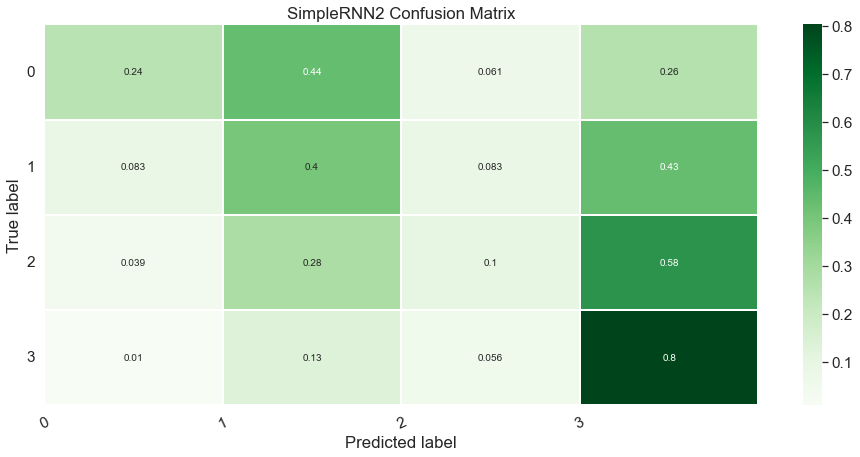

In [14]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SimpleRNN2 Confusion Matrix')
plt.show()

### RNN3

In [50]:
model_RNN3 = Sequential()                            
model_RNN3.add(SimpleRNN(16,
                    activation='linear'))
    
model_RNN3.add(Dense(16,
                    input_dim=X_train_lstm.shape[1],
                    activation='relu'))
model_RNN3.add(Dense(16,
                    activation='relu'))
    
model_RNN3.add(Dense(4,
                    activation='softmax'))

opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model_RNN3.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_RNN3.fit(X_train_lstm, y_train, epochs = 10, batch_size=32)

Epoch 1/10
546/546 [==============================] - 4s 4ms/step - loss: 1.2933 - accuracy: 0.3871
Epoch 2/10
546/546 [==============================] - 1s 3ms/step - loss: 1.2406 - accuracy: 0.4346
Epoch 3/10
546/546 [==============================] - 3s 5ms/step - loss: 1.2198 - accuracy: 0.4491
Epoch 4/10
546/546 [==============================] - 4s 7ms/step - loss: 1.2087 - accuracy: 0.4538
Epoch 5/10
546/546 [==============================] - 4s 7ms/step - loss: 1.2012 - accuracy: 0.4567
Epoch 6/10
546/546 [==============================] - 4s 7ms/step - loss: 1.1946 - accuracy: 0.4583
Epoch 7/10
546/546 [==============================] - 4s 8ms/step - loss: 1.1898 - accuracy: 0.4640
Epoch 8/10
546/546 [==============================] - 4s 7ms/step - loss: 1.1852 - accuracy: 0.4645
Epoch 9/10
546/546 [==============================] - 4s 7ms/step - loss: 1.1816 - accuracy: 0.4673
Epoch 10/10
546/546 [==============================] - 4s 7ms/step - loss: 1.1788 - accuracy: 0.4692

In [51]:
val_loss, val_acc = model_RNN3.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1868 - accuracy: 0.4539


In [52]:
y_pred = model_RNN3.predict(X_test_lstm)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.49      0.16      0.24       572
           1       0.32      0.34      0.33      1007
           2       0.26      0.05      0.08      1029
           3       0.51      0.86      0.64      1756

    accuracy                           0.45      4364
   macro avg       0.40      0.35      0.32      4364
weighted avg       0.41      0.45      0.38      4364



## LSTM Hyperparams

In [103]:
def OSA_model(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()                            
    model.add(LSTM(params['first_neuron'],
                    activation=params['first_activation']))
    
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['second_activation']))
    
    model.add(Dense(y_train.shape[1],
                    activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=1,
                    validation_data=[x_val, y_val])
    
    return out, model

In [105]:
p = {'lr': (0.001, 0.01, 0.1),
     'first_neuron':[4, 8, 16, 32, 64, 128],
     'batch_size': [5, 10, 20],
     'epochs': [5],
     'optimizer': [Adam, Nadam, Adamax],
     'loss': ['categorical_crossentropy'],
     'first_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
     'second_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
     'last_activation': ['softmax']}

In [106]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=OSA_model,
                         experiment_name='OSA_hyper_lstm',
                         fraction_limit=.001)


  0%|          | 0/46 [00:00<?, ?it/s]

Epoch 1/3
3055/3055 [==============================] - 72s 18ms/step - loss: 1.5012 - acc: 0.2336 - val_loss: 1.4739 - val_acc: 0.2406
Epoch 2/3
3055/3055 [==============================] - 50s 16ms/step - loss: 1.4555 - acc: 0.2336 - val_loss: 1.4335 - val_acc: 0.2406
Epoch 3/3
3055/3055 [==============================] - 48s 16ms/step - loss: 1.4184 - acc: 0.2336 - val_loss: 1.4008 - val_acc: 0.2406



  2%|▏         | 1/46 [02:52<2:09:22, 172.50s/it]

Epoch 1/10
3055/3055 [==============================] - 63s 16ms/step - loss: 2.3697 - acc: 0.2298 - val_loss: 2.3254 - val_acc: 0.2333
Epoch 2/10
3055/3055 [==============================] - 40s 13ms/step - loss: 2.3344 - acc: 0.2298 - val_loss: 2.2908 - val_acc: 0.2333
Epoch 3/10
3055/3055 [==============================] - 40s 13ms/step - loss: 2.2998 - acc: 0.2298 - val_loss: 2.2572 - val_acc: 0.2333
Epoch 4/10
3055/3055 [==============================] - 40s 13ms/step - loss: 2.2660 - acc: 0.2298 - val_loss: 2.2242 - val_acc: 0.2333
Epoch 5/10
3055/3055 [==============================] - 43s 14ms/step - loss: 2.2327 - acc: 0.2298 - val_loss: 2.1919 - val_acc: 0.2333
Epoch 6/10
3055/3055 [==============================] - 37s 12ms/step - loss: 2.2001 - acc: 0.2298 - val_loss: 2.1600 - val_acc: 0.2333
Epoch 7/10
3055/3055 [==============================] - 36s 12ms/step - loss: 2.1681 - acc: 0.2298 - val_loss: 2.1290 - val_acc: 0.2333
Epoch 8/10
3055/3055 [==========================


  4%|▍         | 2/46 [09:36<3:46:17, 308.59s/it]

Epoch 1/3
3055/3055 [==============================] - 49s 13ms/step - loss: 1.3824 - acc: 0.2950 - val_loss: 1.3817 - val_acc: 0.3074
Epoch 2/3
3055/3055 [==============================] - 38s 12ms/step - loss: 1.3802 - acc: 0.3166 - val_loss: 1.3796 - val_acc: 0.3239
Epoch 3/3
3055/3055 [==============================] - 38s 12ms/step - loss: 1.3780 - acc: 0.3334 - val_loss: 1.3775 - val_acc: 0.3394



  7%|▋         | 3/46 [11:42<2:41:31, 225.38s/it]

Epoch 1/10
3055/3055 [==============================] - 49s 13ms/step - loss: 1.4365 - acc: 0.2298 - val_loss: 1.4313 - val_acc: 0.2333
Epoch 2/10
3055/3055 [==============================] - 38s 13ms/step - loss: 1.4245 - acc: 0.2298 - val_loss: 1.4200 - val_acc: 0.2333
Epoch 3/10
3055/3055 [==============================] - 37s 12ms/step - loss: 1.4135 - acc: 0.2298 - val_loss: 1.4096 - val_acc: 0.2333
Epoch 4/10
3055/3055 [==============================] - 47s 15ms/step - loss: 1.4033 - acc: 0.2298 - val_loss: 1.4001 - val_acc: 0.2333
Epoch 5/10
3055/3055 [==============================] - 41s 13ms/step - loss: 1.3940 - acc: 0.2298 - val_loss: 1.3913 - val_acc: 0.2331
Epoch 6/10
3055/3055 [==============================] - 39s 13ms/step - loss: 1.3856 - acc: 0.2311 - val_loss: 1.3834 - val_acc: 0.2342
Epoch 7/10
3055/3055 [==============================] - 40s 13ms/step - loss: 1.3779 - acc: 0.2371 - val_loss: 1.3762 - val_acc: 0.2450
Epoch 8/10
3055/3055 [==========================


  9%|▊         | 4/46 [18:41<3:31:19, 301.90s/it]

Epoch 1/10
3055/3055 [==============================] - 35s 9ms/step - loss: 1.4123 - acc: 0.2336 - val_loss: 1.4081 - val_acc: 0.2406
Epoch 2/10
3055/3055 [==============================] - 43s 14ms/step - loss: 1.4084 - acc: 0.2336 - val_loss: 1.4043 - val_acc: 0.2406
Epoch 3/10
3055/3055 [==============================] - 41s 13ms/step - loss: 1.4046 - acc: 0.2336 - val_loss: 1.4007 - val_acc: 0.2406
Epoch 4/10
3055/3055 [==============================] - 36s 12ms/step - loss: 1.4009 - acc: 0.2336 - val_loss: 1.3971 - val_acc: 0.2406
Epoch 5/10
3055/3055 [==============================] - 36s 12ms/step - loss: 1.3973 - acc: 0.2336 - val_loss: 1.3936 - val_acc: 0.2406
Epoch 6/10
3055/3055 [==============================] - 36s 12ms/step - loss: 1.3938 - acc: 0.2336 - val_loss: 1.3903 - val_acc: 0.2406
Epoch 7/10
3055/3055 [==============================] - 41s 13ms/step - loss: 1.3904 - acc: 0.2336 - val_loss: 1.3870 - val_acc: 0.2406
Epoch 8/10
3055/3055 [===========================


 11%|█         | 5/46 [25:42<3:55:31, 344.68s/it]

Epoch 1/10
1528/1528 [==============================] - 38s 15ms/step - loss: 1.3820 - acc: 0.2727 - val_loss: 1.3779 - val_acc: 0.2903
Epoch 2/10
1528/1528 [==============================] - 22s 15ms/step - loss: 1.3745 - acc: 0.3096 - val_loss: 1.3707 - val_acc: 0.3207
Epoch 3/10
1528/1528 [==============================] - 17s 11ms/step - loss: 1.3676 - acc: 0.3373 - val_loss: 1.3640 - val_acc: 0.3478
Epoch 4/10
1528/1528 [==============================] - 19s 12ms/step - loss: 1.3611 - acc: 0.3601 - val_loss: 1.3578 - val_acc: 0.3613
Epoch 5/10
1528/1528 [==============================] - 19s 13ms/step - loss: 1.3550 - acc: 0.3770 - val_loss: 1.3518 - val_acc: 0.3732
Epoch 6/10
1528/1528 [==============================] - 16s 10ms/step - loss: 1.3492 - acc: 0.3861 - val_loss: 1.3463 - val_acc: 0.3837
Epoch 7/10
1528/1528 [==============================] - 16s 10ms/step - loss: 1.3438 - acc: 0.3947 - val_loss: 1.3410 - val_acc: 0.3903
Epoch 8/10
1528/1528 [==========================


 13%|█▎        | 6/46 [29:01<3:16:41, 295.05s/it]

Epoch 1/10
3055/3055 [==============================] - 52s 11ms/step - loss: 1.7508 - acc: 0.2298 - val_loss: 1.7278 - val_acc: 0.2333
Epoch 2/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.7180 - acc: 0.2298 - val_loss: 1.6965 - val_acc: 0.2333
Epoch 3/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.6872 - acc: 0.2298 - val_loss: 1.6672 - val_acc: 0.2333
Epoch 4/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.6584 - acc: 0.2298 - val_loss: 1.6398 - val_acc: 0.2333
Epoch 5/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.6316 - acc: 0.2298 - val_loss: 1.6144 - val_acc: 0.2333
Epoch 6/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.6068 - acc: 0.2298 - val_loss: 1.5909 - val_acc: 0.2333
Epoch 7/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.5836 - acc: 0.2298 - val_loss: 1.5689 - val_acc: 0.2333
Epoch 8/10
3055/3055 [==============================] - 1


 15%|█▌        | 7/46 [31:21<2:38:51, 244.39s/it]

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3922 - acc: 0.1997 - val_loss: 1.3910 - val_acc: 0.2189
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.3890 - acc: 0.2338 - val_loss: 1.3879 - val_acc: 0.2527
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3861 - acc: 0.2686 - val_loss: 1.3851 - val_acc: 0.2866



 17%|█▋        | 8/46 [32:26<1:58:33, 187.21s/it]

Epoch 1/10
3055/3055 [==============================] - 13s 4ms/step - loss: 1.5309 - acc: 0.2298 - val_loss: 1.5068 - val_acc: 0.2333
Epoch 2/10
3055/3055 [==============================] - 11s 4ms/step - loss: 1.4980 - acc: 0.2298 - val_loss: 1.4763 - val_acc: 0.2333
Epoch 3/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.4680 - acc: 0.2298 - val_loss: 1.4487 - val_acc: 0.2333
Epoch 4/10
3055/3055 [==============================] - 11s 4ms/step - loss: 1.4412 - acc: 0.2298 - val_loss: 1.4244 - val_acc: 0.2333
Epoch 5/10
3055/3055 [==============================] - 12s 4ms/step - loss: 1.4177 - acc: 0.2298 - val_loss: 1.4032 - val_acc: 0.2333
Epoch 6/10
3055/3055 [==============================] - 14s 5ms/step - loss: 1.3973 - acc: 0.2298 - val_loss: 1.3851 - val_acc: 0.2333
Epoch 7/10
3055/3055 [==============================] - 14s 5ms/step - loss: 1.3800 - acc: 0.2298 - val_loss: 1.3699 - val_acc: 0.2333
Epoch 8/10
3055/3055 [==============================] -


 20%|█▉        | 9/46 [34:27<1:42:43, 166.59s/it]

Epoch 1/10
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3907 - acc: 0.2308 - val_loss: 1.3896 - val_acc: 0.2319
Epoch 2/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3889 - acc: 0.2305 - val_loss: 1.3879 - val_acc: 0.2334
Epoch 3/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3872 - acc: 0.2299 - val_loss: 1.3862 - val_acc: 0.2339
Epoch 4/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3855 - acc: 0.2294 - val_loss: 1.3846 - val_acc: 0.2353
Epoch 5/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3838 - acc: 0.2360 - val_loss: 1.3829 - val_acc: 0.2449
Epoch 6/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3821 - acc: 0.2706 - val_loss: 1.3814 - val_acc: 0.3090
Epoch 7/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3805 - acc: 0.3508 - val_loss: 1.3798 - val_acc: 0.3712
Epoch 8/10
3055/3055 [==============================] - 9s 


 22%|██▏       | 10/46 [36:02<1:26:47, 144.64s/it]

Epoch 1/3
1528/1528 [==============================] - 10s 4ms/step - loss: 1.4194 - acc: 0.1793 - val_loss: 1.4119 - val_acc: 0.1951
Epoch 2/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.4103 - acc: 0.1939 - val_loss: 1.4034 - val_acc: 0.2169
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4018 - acc: 0.2156 - val_loss: 1.3956 - val_acc: 0.2383



 24%|██▍       | 11/46 [36:24<1:02:21, 106.91s/it]

Epoch 1/10
7636/7636 [==============================] - 25s 3ms/step - loss: 1.3852 - acc: 0.2324 - val_loss: 1.3846 - val_acc: 0.3245
Epoch 2/10
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3820 - acc: 0.3817 - val_loss: 1.3814 - val_acc: 0.3951
Epoch 3/10
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3788 - acc: 0.4034 - val_loss: 1.3783 - val_acc: 0.3978
Epoch 4/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3758 - acc: 0.4045 - val_loss: 1.3753 - val_acc: 0.3978
Epoch 5/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3729 - acc: 0.4045 - val_loss: 1.3725 - val_acc: 0.3975
Epoch 6/10
7636/7636 [==============================] - 26s 3ms/step - loss: 1.3700 - acc: 0.4043 - val_loss: 1.3697 - val_acc: 0.3972
Epoch 7/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3673 - acc: 0.4045 - val_loss: 1.3670 - val_acc: 0.3972
Epoch 8/10
7636/7636 [==============================] -


 26%|██▌       | 12/46 [40:15<1:21:58, 144.65s/it]

Epoch 1/10
1528/1528 [==============================] - 7s 3ms/step - loss: 1.4660 - acc: 0.2298 - val_loss: 1.4562 - val_acc: 0.2333
Epoch 2/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4539 - acc: 0.2298 - val_loss: 1.4448 - val_acc: 0.2333
Epoch 3/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4425 - acc: 0.2298 - val_loss: 1.4340 - val_acc: 0.2333
Epoch 4/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4317 - acc: 0.2298 - val_loss: 1.4238 - val_acc: 0.2333
Epoch 5/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.4215 - acc: 0.2298 - val_loss: 1.4142 - val_acc: 0.2333
Epoch 6/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.4119 - acc: 0.2298 - val_loss: 1.4052 - val_acc: 0.2333
Epoch 7/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4028 - acc: 0.2298 - val_loss: 1.3966 - val_acc: 0.2333
Epoch 8/10
1528/1528 [==============================] - 4s 3ms


 28%|██▊       | 13/46 [41:04<1:03:41, 115.81s/it]

Epoch 1/3
1528/1528 [==============================] - 10s 5ms/step - loss: 1.3829 - acc: 0.4045 - val_loss: 1.3613 - val_acc: 0.3972
Epoch 2/3
1528/1528 [==============================] - 8s 5ms/step - loss: 1.3402 - acc: 0.4045 - val_loss: 1.3324 - val_acc: 0.3972
Epoch 3/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3207 - acc: 0.4045 - val_loss: 1.3189 - val_acc: 0.3972



 30%|███       | 14/46 [41:31<47:24, 88.90s/it]   

Epoch 1/10
7636/7636 [==============================] - 27s 3ms/step - loss: 1.6844 - acc: 0.2336 - val_loss: 1.5837 - val_acc: 0.2406
Epoch 2/10
7636/7636 [==============================] - 24s 3ms/step - loss: 1.5196 - acc: 0.2336 - val_loss: 1.4516 - val_acc: 0.2406
Epoch 3/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.4129 - acc: 0.2336 - val_loss: 1.3743 - val_acc: 0.2417
Epoch 4/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3545 - acc: 0.2819 - val_loss: 1.3364 - val_acc: 0.3494
Epoch 5/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3274 - acc: 0.3824 - val_loss: 1.3203 - val_acc: 0.3975
Epoch 6/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3157 - acc: 0.4031 - val_loss: 1.3136 - val_acc: 0.3987
Epoch 7/10
7636/7636 [==============================] - 24s 3ms/step - loss: 1.3105 - acc: 0.4054 - val_loss: 1.3106 - val_acc: 0.3976
Epoch 8/10
7636/7636 [==============================] -


 33%|███▎      | 15/46 [45:30<1:09:22, 134.28s/it]

Epoch 1/10
1528/1528 [==============================] - 9s 4ms/step - loss: 1.6382 - acc: 0.2336 - val_loss: 1.6241 - val_acc: 0.2406
Epoch 2/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.6182 - acc: 0.2336 - val_loss: 1.6047 - val_acc: 0.2406
Epoch 3/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.5990 - acc: 0.2336 - val_loss: 1.5861 - val_acc: 0.2406
Epoch 4/10
1528/1528 [==============================] - 6s 4ms/step - loss: 1.5805 - acc: 0.2336 - val_loss: 1.5682 - val_acc: 0.2406
Epoch 5/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.5626 - acc: 0.2336 - val_loss: 1.5509 - val_acc: 0.2406
Epoch 6/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.5454 - acc: 0.2336 - val_loss: 1.5342 - val_acc: 0.2406
Epoch 7/10
1528/1528 [==============================] - 5s 4ms/step - loss: 1.5289 - acc: 0.2336 - val_loss: 1.5184 - val_acc: 0.2406
Epoch 8/10
1528/1528 [==============================] - 5s 3ms


 35%|███▍      | 16/46 [46:25<55:08, 110.29s/it]  

Epoch 1/10
7636/7636 [==============================] - 28s 3ms/step - loss: 1.3303 - acc: 0.4045 - val_loss: 1.3184 - val_acc: 0.3972
Epoch 2/10
7636/7636 [==============================] - 27s 4ms/step - loss: 1.3110 - acc: 0.4045 - val_loss: 1.3118 - val_acc: 0.3972
Epoch 3/10
7636/7636 [==============================] - 30s 4ms/step - loss: 1.3076 - acc: 0.4045 - val_loss: 1.3093 - val_acc: 0.3972
Epoch 4/10
7636/7636 [==============================] - 27s 3ms/step - loss: 1.3059 - acc: 0.4045 - val_loss: 1.3077 - val_acc: 0.3972
Epoch 5/10
7636/7636 [==============================] - 26s 3ms/step - loss: 1.3046 - acc: 0.4045 - val_loss: 1.3064 - val_acc: 0.3972
Epoch 6/10
7636/7636 [==============================] - 27s 4ms/step - loss: 1.3033 - acc: 0.4045 - val_loss: 1.3052 - val_acc: 0.3972
Epoch 7/10
7636/7636 [==============================] - 27s 3ms/step - loss: 1.3021 - acc: 0.4045 - val_loss: 1.3039 - val_acc: 0.3972
Epoch 8/10
7636/7636 [==============================] -


 37%|███▋      | 17/46 [50:56<1:16:44, 158.76s/it]

Epoch 1/10
7636/7636 [==============================] - 25s 3ms/step - loss: 1.3467 - acc: 0.2942 - val_loss: 1.3317 - val_acc: 0.3963
Epoch 2/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3220 - acc: 0.4047 - val_loss: 1.3184 - val_acc: 0.3972
Epoch 3/10
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3130 - acc: 0.4045 - val_loss: 1.3132 - val_acc: 0.3972
Epoch 4/10
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3092 - acc: 0.4045 - val_loss: 1.3107 - val_acc: 0.3972
Epoch 5/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3072 - acc: 0.4045 - val_loss: 1.3093 - val_acc: 0.3972
Epoch 6/10
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3058 - acc: 0.4045 - val_loss: 1.3081 - val_acc: 0.3972
Epoch 7/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.3047 - acc: 0.4045 - val_loss: 1.3071 - val_acc: 0.3972
Epoch 8/10
7636/7636 [==============================] -


 39%|███▉      | 18/46 [54:46<1:24:06, 180.24s/it]

Epoch 1/10
1528/1528 [==============================] - 10s 4ms/step - loss: 1.4131 - acc: 0.2308 - val_loss: 1.4057 - val_acc: 0.2368
Epoch 2/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4017 - acc: 0.2343 - val_loss: 1.3953 - val_acc: 0.2400
Epoch 3/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3915 - acc: 0.2448 - val_loss: 1.3859 - val_acc: 0.2505
Epoch 4/10
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3822 - acc: 0.2636 - val_loss: 1.3774 - val_acc: 0.2681
Epoch 5/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3739 - acc: 0.2848 - val_loss: 1.3697 - val_acc: 0.2951
Epoch 6/10
1528/1528 [==============================] - 5s 4ms/step - loss: 1.3663 - acc: 0.3157 - val_loss: 1.3627 - val_acc: 0.3190
Epoch 7/10
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3594 - acc: 0.3412 - val_loss: 1.3563 - val_acc: 0.3463
Epoch 8/10
1528/1528 [==============================] - 5s 4m


 41%|████▏     | 19/46 [55:48<1:05:03, 144.59s/it]

Epoch 1/3
3055/3055 [==============================] - 18s 5ms/step - loss: 1.3147 - acc: 0.4045 - val_loss: 1.3129 - val_acc: 0.3972
Epoch 2/3
3055/3055 [==============================] - 15s 5ms/step - loss: 1.3103 - acc: 0.4045 - val_loss: 1.3120 - val_acc: 0.3972
Epoch 3/3
3055/3055 [==============================] - 15s 5ms/step - loss: 1.3096 - acc: 0.4045 - val_loss: 1.3115 - val_acc: 0.3972



 43%|████▎     | 20/46 [56:36<50:08, 115.72s/it]  

Epoch 1/3
3055/3055 [==============================] - 16s 4ms/step - loss: 1.3612 - acc: 0.4040 - val_loss: 1.3519 - val_acc: 0.3972
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3415 - acc: 0.4045 - val_loss: 1.3371 - val_acc: 0.3972
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3299 - acc: 0.4045 - val_loss: 1.3284 - val_acc: 0.3972



 46%|████▌     | 21/46 [57:16<38:39, 92.77s/it] 

Epoch 1/10
7636/7636 [==============================] - 31s 4ms/step - loss: 1.3818 - acc: 0.3690 - val_loss: 1.3767 - val_acc: 0.3972
Epoch 2/10
7636/7636 [==============================] - 29s 4ms/step - loss: 1.3714 - acc: 0.4045 - val_loss: 1.3671 - val_acc: 0.3972
Epoch 3/10
7636/7636 [==============================] - 32s 4ms/step - loss: 1.3620 - acc: 0.4045 - val_loss: 1.3584 - val_acc: 0.3972
Epoch 4/10
7636/7636 [==============================] - 33s 4ms/step - loss: 1.3535 - acc: 0.4045 - val_loss: 1.3506 - val_acc: 0.3972
Epoch 5/10
7636/7636 [==============================] - 28s 4ms/step - loss: 1.3460 - acc: 0.4045 - val_loss: 1.3438 - val_acc: 0.3972
Epoch 6/10
7636/7636 [==============================] - 27s 3ms/step - loss: 1.3395 - acc: 0.4045 - val_loss: 1.3379 - val_acc: 0.3972
Epoch 7/10
7636/7636 [==============================] - 27s 4ms/step - loss: 1.3339 - acc: 0.4045 - val_loss: 1.3330 - val_acc: 0.3972
Epoch 8/10
7636/7636 [==============================] -


 48%|████▊     | 22/46 [1:02:03<1:00:24, 151.03s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.4735 - acc: 0.1515 - val_loss: 1.4643 - val_acc: 0.1488
Epoch 2/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.4508 - acc: 0.1543 - val_loss: 1.4441 - val_acc: 0.1483
Epoch 3/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.4328 - acc: 0.1604 - val_loss: 1.4281 - val_acc: 0.1515



 50%|█████     | 23/46 [1:03:13<48:37, 126.84s/it]  

Epoch 1/3
7636/7636 [==============================] - 23s 3ms/step - loss: 1.4629 - acc: 0.2298 - val_loss: 1.4502 - val_acc: 0.2333
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.4330 - acc: 0.2297 - val_loss: 1.4242 - val_acc: 0.2333
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.4100 - acc: 0.2297 - val_loss: 1.4038 - val_acc: 0.2334



 52%|█████▏    | 24/46 [1:04:20<39:58, 109.01s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 3ms/step - loss: 1.5698 - acc: 0.1321 - val_loss: 1.5672 - val_acc: 0.1289
Epoch 2/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.5641 - acc: 0.1321 - val_loss: 1.5616 - val_acc: 0.1289
Epoch 3/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.5584 - acc: 0.1321 - val_loss: 1.5561 - val_acc: 0.1289



 54%|█████▍    | 25/46 [1:04:36<28:19, 80.92s/it] 

Epoch 1/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.7588 - acc: 0.2336 - val_loss: 1.7354 - val_acc: 0.2406
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.7103 - acc: 0.2336 - val_loss: 1.6899 - val_acc: 0.2406
Epoch 3/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.6668 - acc: 0.2336 - val_loss: 1.6490 - val_acc: 0.2406



 57%|█████▋    | 26/46 [1:05:38<25:08, 75.41s/it]

Epoch 1/10
3055/3055 [==============================] - 13s 3ms/step - loss: 1.3953 - acc: 0.2332 - val_loss: 1.3925 - val_acc: 0.2423
Epoch 2/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3927 - acc: 0.2329 - val_loss: 1.3900 - val_acc: 0.2394
Epoch 3/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3902 - acc: 0.2342 - val_loss: 1.3876 - val_acc: 0.2403
Epoch 4/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3877 - acc: 0.2343 - val_loss: 1.3852 - val_acc: 0.2414
Epoch 5/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3854 - acc: 0.2351 - val_loss: 1.3830 - val_acc: 0.2403
Epoch 6/10
3055/3055 [==============================] - 8s 3ms/step - loss: 1.3831 - acc: 0.2354 - val_loss: 1.3807 - val_acc: 0.2400
Epoch 7/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3808 - acc: 0.2357 - val_loss: 1.3786 - val_acc: 0.2386
Epoch 8/10
3055/3055 [==============================] - 9s 3m


 59%|█████▊    | 27/46 [1:07:12<25:35, 80.82s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 3ms/step - loss: 1.4652 - acc: 0.2287 - val_loss: 1.4519 - val_acc: 0.2331
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4456 - acc: 0.2296 - val_loss: 1.4343 - val_acc: 0.2331
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.4295 - acc: 0.2297 - val_loss: 1.4201 - val_acc: 0.2333



 61%|██████    | 28/46 [1:07:32<18:44, 62.48s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 3ms/step - loss: 1.4540 - acc: 0.2298 - val_loss: 1.4500 - val_acc: 0.2333
Epoch 2/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.4516 - acc: 0.2298 - val_loss: 1.4477 - val_acc: 0.2333
Epoch 3/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4493 - acc: 0.2298 - val_loss: 1.4455 - val_acc: 0.2333



 63%|██████▎   | 29/46 [1:07:47<13:44, 48.50s/it]

Epoch 1/10
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3399 - acc: 0.4045 - val_loss: 1.3443 - val_acc: 0.3972
Epoch 2/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3366 - acc: 0.4045 - val_loss: 1.3409 - val_acc: 0.3972
Epoch 3/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3337 - acc: 0.4045 - val_loss: 1.3378 - val_acc: 0.3972
Epoch 4/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3310 - acc: 0.4045 - val_loss: 1.3351 - val_acc: 0.3972
Epoch 5/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3287 - acc: 0.4045 - val_loss: 1.3326 - val_acc: 0.3972
Epoch 6/10
3055/3055 [==============================] - 8s 3ms/step - loss: 1.3266 - acc: 0.4045 - val_loss: 1.3304 - val_acc: 0.3972
Epoch 7/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3247 - acc: 0.4045 - val_loss: 1.3285 - val_acc: 0.3972
Epoch 8/10
3055/3055 [==============================] - 8s 3m


 65%|██████▌   | 30/46 [1:09:18<16:18, 61.18s/it]

Epoch 1/10
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3861 - acc: 0.2309 - val_loss: 1.3639 - val_acc: 0.2388
Epoch 2/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3483 - acc: 0.3070 - val_loss: 1.3368 - val_acc: 0.3888
Epoch 3/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3274 - acc: 0.4053 - val_loss: 1.3220 - val_acc: 0.3972
Epoch 4/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3158 - acc: 0.4045 - val_loss: 1.3138 - val_acc: 0.3972
Epoch 5/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3093 - acc: 0.4045 - val_loss: 1.3092 - val_acc: 0.3972
Epoch 6/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3055 - acc: 0.4045 - val_loss: 1.3063 - val_acc: 0.3972
Epoch 7/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3030 - acc: 0.4045 - val_loss: 1.3045 - val_acc: 0.3972
Epoch 8/10
7636/7636 [==============================] -


 67%|██████▋   | 31/46 [1:12:41<25:57, 103.82s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 3ms/step - loss: 1.3840 - acc: 0.2722 - val_loss: 1.3765 - val_acc: 0.3020
Epoch 2/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3717 - acc: 0.3320 - val_loss: 1.3653 - val_acc: 0.3506
Epoch 3/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3611 - acc: 0.3695 - val_loss: 1.3555 - val_acc: 0.3753



 70%|██████▉   | 32/46 [1:12:58<18:07, 77.70s/it] 

Epoch 1/10
1528/1528 [==============================] - 9s 4ms/step - loss: 1.3869 - acc: 0.2283 - val_loss: 1.3844 - val_acc: 0.2537
Epoch 2/10
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3818 - acc: 0.2885 - val_loss: 1.3796 - val_acc: 0.3126
Epoch 3/10
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3771 - acc: 0.3510 - val_loss: 1.3751 - val_acc: 0.3654
Epoch 4/10
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3725 - acc: 0.3935 - val_loss: 1.3706 - val_acc: 0.3932
Epoch 5/10
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3681 - acc: 0.4024 - val_loss: 1.3662 - val_acc: 0.3958
Epoch 6/10
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3636 - acc: 0.4045 - val_loss: 1.3619 - val_acc: 0.3973
Epoch 7/10
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3592 - acc: 0.4045 - val_loss: 1.3575 - val_acc: 0.3972
Epoch 8/10
1528/1528 [==============================] - 6s 4ms


 72%|███████▏  | 33/46 [1:14:00<15:48, 72.93s/it]

Epoch 1/10
3055/3055 [==============================] - 13s 3ms/step - loss: 1.3812 - acc: 0.4045 - val_loss: 1.3786 - val_acc: 0.3972
Epoch 2/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3668 - acc: 0.4045 - val_loss: 1.3656 - val_acc: 0.3972
Epoch 3/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3551 - acc: 0.4045 - val_loss: 1.3550 - val_acc: 0.3972
Epoch 4/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3457 - acc: 0.4045 - val_loss: 1.3465 - val_acc: 0.3972
Epoch 5/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3381 - acc: 0.4045 - val_loss: 1.3396 - val_acc: 0.3972
Epoch 6/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3320 - acc: 0.4045 - val_loss: 1.3340 - val_acc: 0.3972
Epoch 7/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3271 - acc: 0.4045 - val_loss: 1.3294 - val_acc: 0.3972
Epoch 8/10
3055/3055 [==============================] - 9s 


 74%|███████▍  | 34/46 [1:15:38<16:06, 80.53s/it]

Epoch 1/3
7636/7636 [==============================] - 24s 3ms/step - loss: 1.3846 - acc: 0.2493 - val_loss: 1.3828 - val_acc: 0.3972
Epoch 2/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3788 - acc: 0.4045 - val_loss: 1.3772 - val_acc: 0.3972
Epoch 3/3
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3734 - acc: 0.4045 - val_loss: 1.3721 - val_acc: 0.3972



 76%|███████▌  | 35/46 [1:16:44<13:55, 75.96s/it]

Epoch 1/10
7636/7636 [==============================] - 23s 3ms/step - loss: 1.6342 - acc: 0.1321 - val_loss: 1.6023 - val_acc: 0.1289
Epoch 2/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.5661 - acc: 0.1321 - val_loss: 1.5405 - val_acc: 0.1289
Epoch 3/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.5108 - acc: 0.1321 - val_loss: 1.4907 - val_acc: 0.1289
Epoch 4/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.4664 - acc: 0.1321 - val_loss: 1.4511 - val_acc: 0.1289
Epoch 5/10
7636/7636 [==============================] - 21s 3ms/step - loss: 1.4313 - acc: 0.1321 - val_loss: 1.4198 - val_acc: 0.1289
Epoch 6/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.4037 - acc: 0.1526 - val_loss: 1.3953 - val_acc: 0.2214
Epoch 7/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3822 - acc: 0.3298 - val_loss: 1.3763 - val_acc: 0.3874
Epoch 8/10
7636/7636 [==============================] -


 78%|███████▊  | 36/46 [1:20:09<19:07, 114.75s/it]

Epoch 1/10
1528/1528 [==============================] - 8s 3ms/step - loss: 1.3855 - acc: 0.2477 - val_loss: 1.3843 - val_acc: 0.2493
Epoch 2/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3833 - acc: 0.2542 - val_loss: 1.3822 - val_acc: 0.2582
Epoch 3/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3812 - acc: 0.2615 - val_loss: 1.3802 - val_acc: 0.2640
Epoch 4/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3791 - acc: 0.2704 - val_loss: 1.3782 - val_acc: 0.2707
Epoch 5/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.3771 - acc: 0.2793 - val_loss: 1.3762 - val_acc: 0.2817
Epoch 6/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3751 - acc: 0.2889 - val_loss: 1.3743 - val_acc: 0.2904
Epoch 7/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3731 - acc: 0.2988 - val_loss: 1.3724 - val_acc: 0.3025
Epoch 8/10
1528/1528 [==============================] - 5s 3ms


 80%|████████  | 37/46 [1:20:57<14:12, 94.69s/it] 

Epoch 1/3
1528/1528 [==============================] - 8s 3ms/step - loss: 1.3911 - acc: 0.2452 - val_loss: 1.3887 - val_acc: 0.2495
Epoch 2/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3871 - acc: 0.2565 - val_loss: 1.3850 - val_acc: 0.2618
Epoch 3/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3833 - acc: 0.2693 - val_loss: 1.3813 - val_acc: 0.2712



 83%|████████▎ | 38/46 [1:21:13<09:30, 71.29s/it]

Epoch 1/3
3055/3055 [==============================] - 14s 4ms/step - loss: 1.3964 - acc: 0.2298 - val_loss: 1.3673 - val_acc: 0.2333
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3533 - acc: 0.2453 - val_loss: 1.3384 - val_acc: 0.3972
Epoch 3/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3314 - acc: 0.4045 - val_loss: 1.3245 - val_acc: 0.3972



 85%|████████▍ | 39/46 [1:21:50<07:06, 60.88s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.3710 - acc: 0.4045 - val_loss: 1.3701 - val_acc: 0.3972
Epoch 2/3
7636/7636 [==============================] - 21s 3ms/step - loss: 1.3679 - acc: 0.4045 - val_loss: 1.3671 - val_acc: 0.3972
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3649 - acc: 0.4045 - val_loss: 1.3643 - val_acc: 0.3972



 87%|████████▋ | 40/46 [1:22:59<06:19, 63.22s/it]

Epoch 1/10
3055/3055 [==============================] - 12s 3ms/step - loss: 2.1862 - acc: 0.1321 - val_loss: 2.1535 - val_acc: 0.1289
Epoch 2/10
3055/3055 [==============================] - 9s 3ms/step - loss: 2.1215 - acc: 0.1321 - val_loss: 2.0905 - val_acc: 0.1289
Epoch 3/10
3055/3055 [==============================] - 10s 3ms/step - loss: 2.0602 - acc: 0.1321 - val_loss: 2.0309 - val_acc: 0.1289
Epoch 4/10
3055/3055 [==============================] - 9s 3ms/step - loss: 2.0027 - acc: 0.1321 - val_loss: 1.9750 - val_acc: 0.1289
Epoch 5/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.9482 - acc: 0.1321 - val_loss: 1.9220 - val_acc: 0.1289
Epoch 6/10
3055/3055 [==============================] - 12s 4ms/step - loss: 1.8969 - acc: 0.1321 - val_loss: 1.8723 - val_acc: 0.1289
Epoch 7/10
3055/3055 [==============================] - 10s 3ms/step - loss: 1.8489 - acc: 0.1321 - val_loss: 1.8257 - val_acc: 0.1289
Epoch 8/10
3055/3055 [==============================] - 1


 89%|████████▉ | 41/46 [1:24:48<06:24, 76.91s/it]

Epoch 1/10
7636/7636 [==============================] - 25s 3ms/step - loss: 1.3607 - acc: 0.2336 - val_loss: 1.3556 - val_acc: 0.2406
Epoch 2/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3584 - acc: 0.2336 - val_loss: 1.3535 - val_acc: 0.2406
Epoch 3/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3563 - acc: 0.2336 - val_loss: 1.3515 - val_acc: 0.2406
Epoch 4/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3542 - acc: 0.2336 - val_loss: 1.3496 - val_acc: 0.2406
Epoch 5/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3522 - acc: 0.2336 - val_loss: 1.3478 - val_acc: 0.2406
Epoch 6/10
7636/7636 [==============================] - 20s 3ms/step - loss: 1.3503 - acc: 0.2336 - val_loss: 1.3461 - val_acc: 0.2406
Epoch 7/10
7636/7636 [==============================] - 21s 3ms/step - loss: 1.3485 - acc: 0.2336 - val_loss: 1.3445 - val_acc: 0.2406
Epoch 8/10
7636/7636 [==============================] -


 91%|█████████▏| 42/46 [1:28:15<07:43, 115.94s/it]

Epoch 1/3
7636/7636 [==============================] - 25s 3ms/step - loss: 1.3551 - acc: 0.4045 - val_loss: 1.3540 - val_acc: 0.3972
Epoch 2/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3437 - acc: 0.4045 - val_loss: 1.3439 - val_acc: 0.3972
Epoch 3/3
7636/7636 [==============================] - 22s 3ms/step - loss: 1.3350 - acc: 0.4045 - val_loss: 1.3362 - val_acc: 0.3972



 93%|█████████▎| 43/46 [1:29:24<05:05, 101.84s/it]

Epoch 1/10
3055/3055 [==============================] - 12s 3ms/step - loss: 1.4744 - acc: 0.1727 - val_loss: 1.4523 - val_acc: 0.1801
Epoch 2/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.4372 - acc: 0.1894 - val_loss: 1.4202 - val_acc: 0.1965
Epoch 3/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.4088 - acc: 0.2099 - val_loss: 1.3953 - val_acc: 0.2382
Epoch 4/10
3055/3055 [==============================] - 8s 3ms/step - loss: 1.3865 - acc: 0.2619 - val_loss: 1.3756 - val_acc: 0.3089
Epoch 5/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3687 - acc: 0.3404 - val_loss: 1.3598 - val_acc: 0.3729
Epoch 6/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3543 - acc: 0.3947 - val_loss: 1.3470 - val_acc: 0.4010
Epoch 7/10
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3425 - acc: 0.4117 - val_loss: 1.3364 - val_acc: 0.4030
Epoch 8/10
3055/3055 [==============================] - 8s 3m


 96%|█████████▌| 44/46 [1:30:55<03:17, 98.72s/it] 

Epoch 1/10
1528/1528 [==============================] - 7s 3ms/step - loss: 1.4151 - acc: 0.1359 - val_loss: 1.4164 - val_acc: 0.1317
Epoch 2/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.4137 - acc: 0.1401 - val_loss: 1.4149 - val_acc: 0.1355
Epoch 3/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.4122 - acc: 0.1460 - val_loss: 1.4135 - val_acc: 0.1416
Epoch 4/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4108 - acc: 0.1543 - val_loss: 1.4120 - val_acc: 0.1526
Epoch 5/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.4094 - acc: 0.1683 - val_loss: 1.4106 - val_acc: 0.1696
Epoch 6/10
1528/1528 [==============================] - 4s 3ms/step - loss: 1.4080 - acc: 0.1869 - val_loss: 1.4093 - val_acc: 0.1856
Epoch 7/10
1528/1528 [==============================] - 5s 3ms/step - loss: 1.4066 - acc: 0.2103 - val_loss: 1.4079 - val_acc: 0.2076
Epoch 8/10
1528/1528 [==============================] - 4s 3ms


 98%|█████████▊| 45/46 [1:31:41<01:22, 82.89s/it]

Epoch 1/3
1528/1528 [==============================] - 10s 4ms/step - loss: 1.6265 - acc: 0.2298 - val_loss: 1.5987 - val_acc: 0.2333
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.5715 - acc: 0.2298 - val_loss: 1.5476 - val_acc: 0.2333
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.5235 - acc: 0.2298 - val_loss: 1.5031 - val_acc: 0.2333



100%|██████████| 46/46 [1:32:03<00:00, 120.07s/it][A


In [107]:
analyze_object = talos.Analyze(scan_object)

In [108]:
analyze_object.data

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,lr,first_neuron,batch_size,epochs,dropout,optimizer,loss,first_activation,second_activation,last_activation,weight_regulizer
0,07/13/22-025220,07/13/22-025511,170.910510,3,1.418400,0.233565,1.400816,0.240605,0.001,32,5,3,0.20,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,linear,hard_sigmoid,softmax,None
1,07/13/22-025512,07/13/22-030155,402.885345,10,2.076251,0.229767,2.039679,0.233272,0.001,16,5,10,0.32,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,softmax,softplus,softmax,None
2,07/13/22-030156,07/13/22-030401,125.277733,3,1.377966,0.333421,1.377525,0.339444,0.001,4,5,3,0.28,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,sigmoid,tanh,softmax,None
3,07/13/22-030402,07/13/22-031101,418.231230,10,1.358620,0.370285,1.358256,0.380232,0.001,4,5,10,0.16,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,hard_sigmoid,linear,softmax,None
4,07/13/22-031102,07/13/22-031801,419.018404,10,1.380661,0.233434,1.377626,0.241522,0.001,4,5,10,0.24,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,softplus,hard_sigmoid,softmax,None
5,07/13/22-031802,07/13/22-032120,197.309680,10,1.329286,0.402370,1.327125,0.394745,0.001,16,10,10,0.08,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,relu,linear,softmax,None
6,07/13/22-032121,07/13/22-032341,139.717812,10,1.523960,0.229767,1.512460,0.233272,0.001,4,5,10,0.32,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,sigmoid,softplus,softmax,None
7,07/13/22-032341,07/13/22-032445,64.422050,3,1.386097,0.268596,1.385063,0.286587,0.001,4,2,3,0.08,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,linear,relu,softmax,None
8,07/13/22-032446,07/13/22-032647,120.890296,10,1.343736,0.404531,1.338792,0.397189,0.001,64,5,10,0.28,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,softmax,hard_sigmoid,softmax,None
9,07/13/22-032647,07/13/22-032822,95.124956,10,1.375772,0.404531,1.375213,0.397189,0.001,16,5,10,0.28,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,softmax,softsign,softmax,None


In [109]:
analyze_object.high('val_acc')

0.39734187722206116

In [110]:
analyze_object.rounds2high('val_acc')

43

In [111]:
n= analyze_object.rounds2high('val_acc')
analyze_object.data.loc[n]

start                                                  07/13/22-042144
end                                                    07/13/22-042315
duration                                                     91.020877
round_epochs                                                        10
loss                                                          1.318287
acc                                                            0.40499
val_loss                                                      1.314848
val_acc                                                       0.397342
lr                                                               0.001
first_neuron                                                        16
batch_size                                                           5
epochs                                                              10
dropout                                                           0.04
optimizer            <class 'keras.optimizers.optimizer_v2.nadam.Na...
loss  

In [112]:
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'], n =1) 
# the 1st parameter is the metric youre interested in, the 2nd parameter is the metrics you want excluded, it runs 10 scans by defualt, but you can change this to n = #
# this returns the parameters for the run with highest val_acc (run 22)

array([['tanh', 10, '07/13/22-042144', 16,
        <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'softmax',
        '07/13/22-042315', 0.04, 10, 91.02087736129761, 'linear', 5,
        None, 0.001, 0]], dtype=object)

In [113]:
analyze_object.correlate('val_acc', ['acc', 'loss', 'val_loss'])

duration        0.151336
round_epochs    0.209034
lr                   NaN
first_neuron    0.431531
batch_size     -0.242086
epochs          0.209034
dropout        -0.098366
Name: val_acc, dtype: float64

### Increasing the number of hidden layers for LSTM model

#### LSTM2 Model

In [60]:
model_lstm2 = Sequential()                            
model_lstm2.add(LSTM(16,
                    activation='linear'))
    
model_lstm2.add(Dense(16,
                    input_dim=X_train_lstm.shape[1],
                    activation='relu'))
model_lstm2.add(Dense(16,
                    activation='relu'))
    
model_lstm2.add(Dense(4,
                    activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model_lstm2.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_lstm2.fit(X_train_lstm, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
546/546 [==============================] - 23s 10ms/step - loss: 1.2391 - accuracy: 0.4354
Epoch 2/10
546/546 [==============================] - 5s 10ms/step - loss: 1.1907 - accuracy: 0.4620
Epoch 3/10
546/546 [==============================] - 6s 12ms/step - loss: 1.1782 - accuracy: 0.4694
Epoch 4/10
546/546 [==============================] - 7s 12ms/step - loss: 1.1713 - accuracy: 0.4712
Epoch 5/10
546/546 [==============================] - 6s 11ms/step - loss: 1.1680 - accuracy: 0.4782
Epoch 6/10
546/546 [==============================] - 7s 12ms/step - loss: 1.1675 - accuracy: 0.4753
Epoch 7/10
546/546 [==============================] - 6s 10ms/step - loss: 1.1632 - accuracy: 0.4766
Epoch 8/10
546/546 [==============================] - 6s 11ms/step - loss: 1.1597 - accuracy: 0.4800
Epoch 9/10
546/546 [==============================] - 7s 12ms/step - loss: 1.1599 - accuracy: 0.4753
Epoch 10/10
546/546 [==============================] - 7s 13ms/step - loss: 1.1573 - accur

In [61]:
val_loss, val_acc = model_lstm2.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 3s 9ms/step - loss: 1.1770 - accuracy: 0.4553


In [62]:
y_pred = model_lstm2.predict(X_test_lstm)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.48      0.19      0.27       572
           1       0.32      0.28      0.30      1007
           2       0.28      0.16      0.20      1029
           3       0.53      0.82      0.65      1756

    accuracy                           0.46      4364
   macro avg       0.40      0.36      0.35      4364
weighted avg       0.42      0.46      0.41      4364



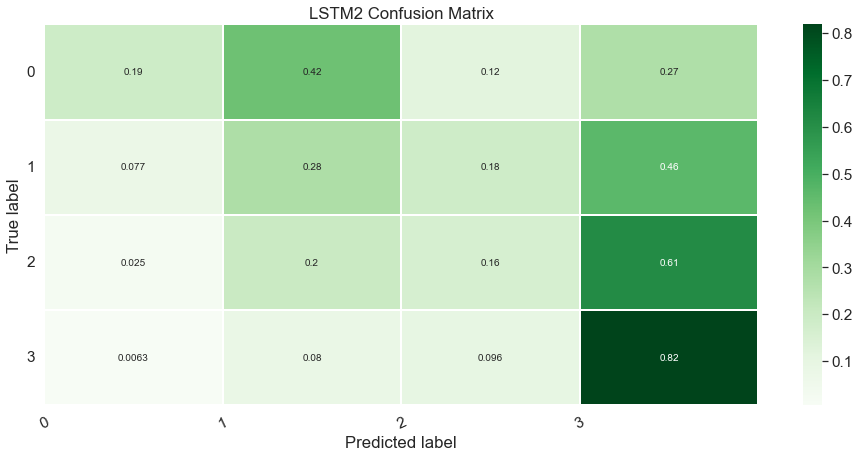

In [63]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('LSTM2 Confusion Matrix')
plt.show()

### LSTM3

In [82]:
model_lstm2 = Sequential()                            
model_lstm2.add(LSTM(16,
                    activation='tanh'))
    
model_lstm2.add(Dense(16,
                    input_dim=X_train_lstm.shape[1],
                    activation='relu'))
model_lstm2.add(Dense(16,
                    activation='relu'))
    
model_lstm2.add(Dense(4,
                    activation='softmax'))

opt = tf.keras.optimizers.Adamax(learning_rate = 0.01, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model_lstm2.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_lstm2.fit(X_train_lstm, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
546/546 [==============================] - 5s 3ms/step - loss: 1.2169 - accuracy: 0.4454
Epoch 2/20
546/546 [==============================] - 2s 4ms/step - loss: 1.1809 - accuracy: 0.4655
Epoch 3/20
546/546 [==============================] - 2s 4ms/step - loss: 1.1765 - accuracy: 0.4689
Epoch 4/20
546/546 [==============================] - 3s 5ms/step - loss: 1.1710 - accuracy: 0.4700
Epoch 5/20
546/546 [==============================] - 2s 4ms/step - loss: 1.1664 - accuracy: 0.4741
Epoch 6/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1636 - accuracy: 0.4762
Epoch 7/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1609 - accuracy: 0.4747
Epoch 8/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1587 - accuracy: 0.4781
Epoch 9/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1562 - accuracy: 0.4795
Epoch 10/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1546 - accuracy: 0.4809

In [83]:
val_loss, val_acc = model_lstm2.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1914 - accuracy: 0.4581


In [84]:
y_pred = model_lstm2.predict(X_test_lstm)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.49      0.15      0.23       572
           1       0.34      0.35      0.34      1007
           2       0.30      0.17      0.22      1029
           3       0.54      0.79      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.42      0.36      0.36      4364
weighted avg       0.43      0.46      0.42      4364

